# 0. 기본 설정

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


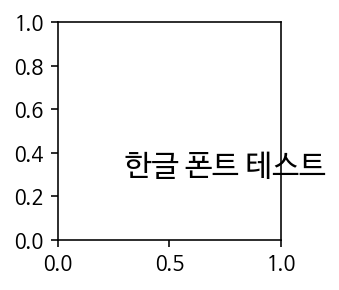

In [1]:
# 그래프 한글 폰트 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

from IPython.display import set_matplotlib_formats
#폰트 선명하게 보이게 하기 위해
set_matplotlib_formats('retina')

## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show()

In [2]:
# 디렉토리 지정
import os 

# 기본 라이브러리
import pandas as pd 
import numpy as np
from datetime import * 
import math

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [4]:
# 경로 설정       
os.chdir('/content/drive/My Drive/[SCDC 2020] 삼성카드 데이터분석 공모전/데이터SET')
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1tTWOALNb4GwbqON_rOyaA5vfRnpaJT3U/[SCDC 2020] 삼성카드 데이터분석 공모전/데이터SET'

In [5]:
trend = pd.read_csv('[Track2_데이터1] trend_w_demo.csv', encoding='CP949')
trend

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low
...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,E,low,mid,low,low,low,low
452034,201904,할인점,0,H,high,low,low,low,low,low
452035,201904,할인점,1,H,high,low,low,low,low,low
452036,201904,할인점,0,H,high,low,low,low,low,low


### trend_w_demo.csv: 온라인 가맹점 업종 정보
- YM: 이용 연월
- Category:	이용 업종
- 성별구분:	0: 남성, 1: 여성
- 연령대:	연령 구간. 알파벳 순서와 연령 순서는 무관.
- 기혼스코어:	 카드 이용 고객이 기혼일 확률
- 유아자녀스코어:	 카드 이용 고객이에게 유아자녀가 있을 확률
- 초등학생자녀스코어:	카드 이용 고객이에게 초등학생 자녀가 있을 확률
- 중고생자녀스코어:	카드 이용 고객이에게 중고생 자녀가 있을 확률
- 대학생자녀스코어:	카드 이용 고객이에게 대학생 자녀가 있을 확률
- 전업주부스코어:	카드 이용 고객이 전업주부일 확률




















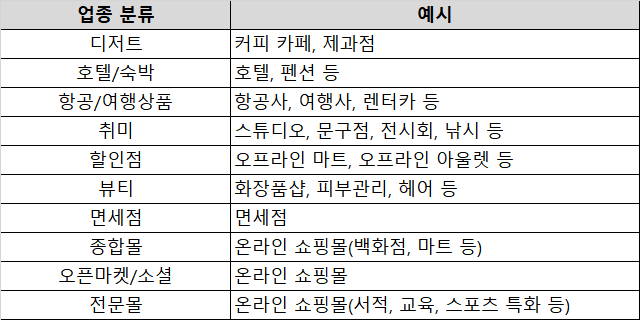

## 2019년과 2020년 분리

In [6]:
trend['year'] = trend['YM'].astype(str).apply(lambda x: int(x[:4]))

In [7]:
trend['온라인'] = trend['Category'].apply(lambda x: 1 if (x=='종합몰') | (x=='오픈마켓/소셜') | (x=='전문몰') else 0)

In [8]:
trend2019 = trend[trend['YM']<202000]
trend2020 = trend[trend['YM']>=202000]

In [9]:
trend2019

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,year,온라인
210468,201905,전문몰,1,E,low,low,low,low,low,mid,2019,1
210469,201905,전문몰,1,E,mid,mid,low,low,low,mid,2019,1
210470,201905,할인점,1,F,high,low,mid,mid,mid,mid,2019,0
210471,201905,전문몰,0,G,high,low,mid,mid,mid,low,2019,1
210472,201905,전문몰,1,H,high,low,low,low,mid,mid,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,E,low,mid,low,low,low,low,2019,1
452034,201904,할인점,0,H,high,low,low,low,low,low,2019,0
452035,201904,할인점,1,H,high,low,low,low,low,low,2019,0
452036,201904,할인점,0,H,high,low,low,low,low,low,2019,0


In [10]:
trend2020

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,year,온라인
0,202005,할인점,0,F,high,low,high,mid,low,low,2020,0
1,202005,취미,0,B,high,low,mid,mid,low,low,2020,0
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid,2020,1
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low,2020,0
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...
210463,202004,오픈마켓/소셜,1,D,mid,mid,low,mid,low,mid,2020,1
210464,202004,전문몰,1,D,mid,mid,low,mid,low,low,2020,1
210465,202004,오픈마켓/소셜,0,C,mid,mid,high,low,low,low,2020,1
210466,202004,할인점,0,F,high,low,mid,mid,mid,low,2020,0


## 카테고리별 변화 탐색

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


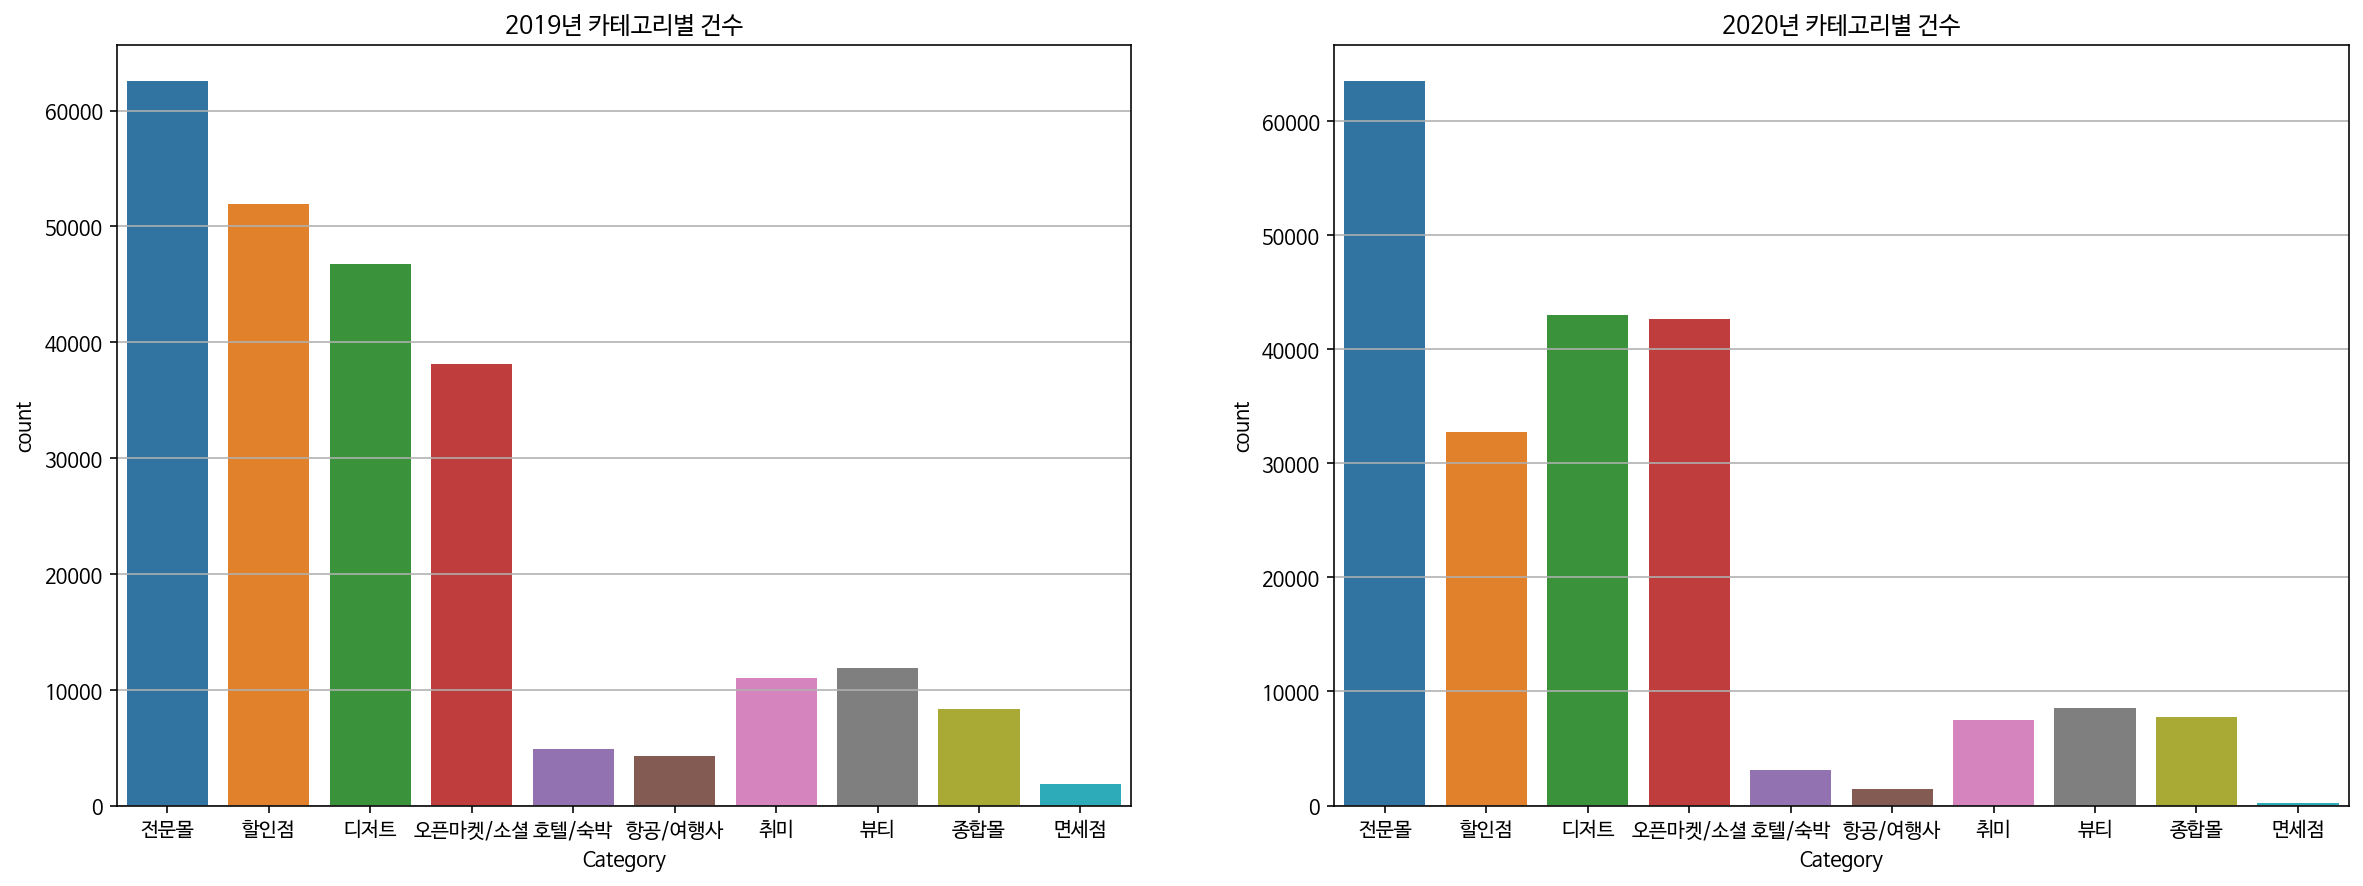

In [ ]:
#2019년 인기 카테고리
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('2019년 카테고리별 건수')
plt.grid(True)
sns.countplot(trend2019['Category'],order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
#2020년 인기 카테고리
plt.subplot(122)
plt.title('2020년 카테고리별 건수')
plt.grid(True)
sns.countplot(trend2020['Category'],order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
###할인점의 이용이 크게 줄었고, 오픈마켓/소셜의 이용이 좀 늘어남. 그 외 호텔/숙박, 항공/여행사, 면세점에서 감소

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '전체 연령대')

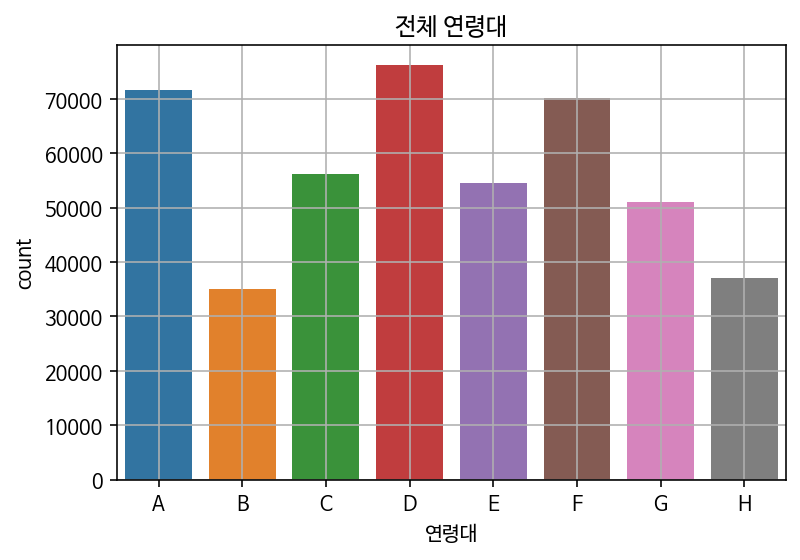

In [ ]:
#전체 연령대
sns.countplot(trend['연령대'],order=['A','B','C','D','E','F','G','H'])
plt.grid(True)
plt.title('전체 연령대')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '할인점 이용 연령대')

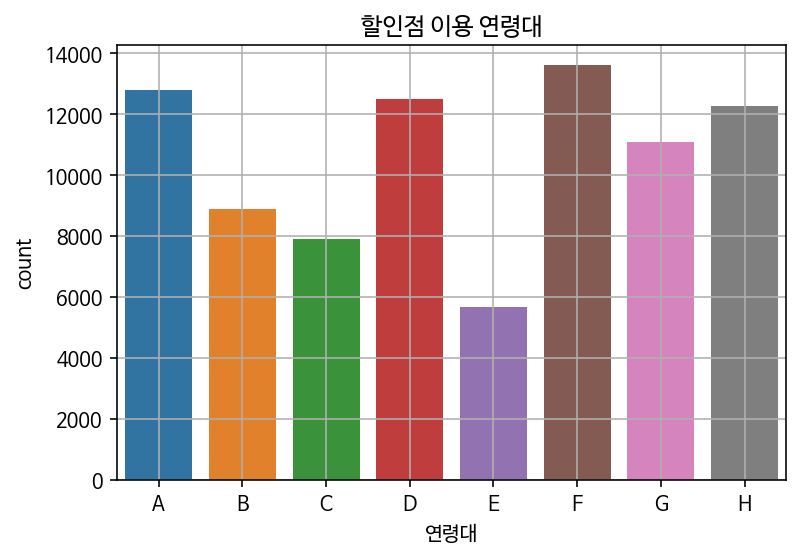

In [ ]:
###그렇다면 할인점을 주로 이용하는 고객군은 어디일까?
sns.countplot(trend[trend['Category']=='할인점']['연령대'],order=['A','B','C','D','E','F','G','H'])
plt.grid(True)
plt.title('할인점 이용 연령대')
###A,D,F연령대가 뭐지

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '오픈마켓/소셜 이용 연령대')

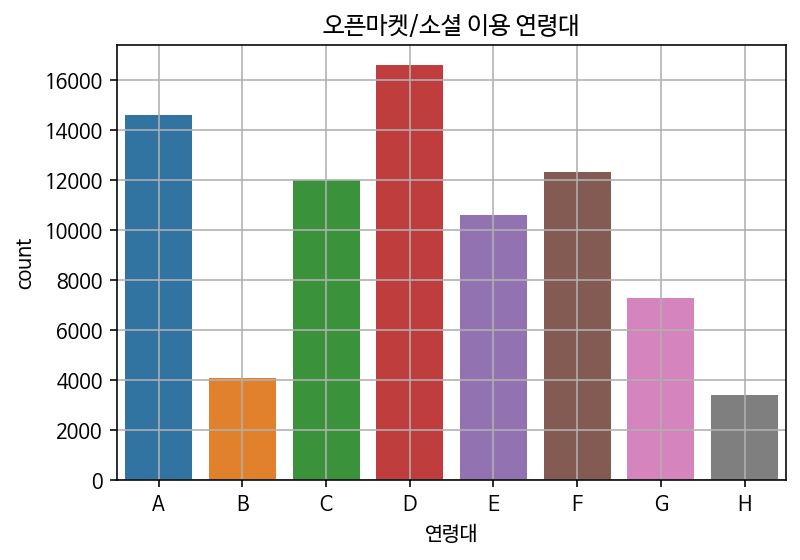

In [ ]:
###그렇다면 오픈마켓/소셜을 주로 이용하는 고객군은 어디일까?
sns.countplot(trend[trend['Category']=='오픈마켓/소셜']['연령대'],order=['A','B','C','D','E','F','G','H'])
plt.grid(True)
plt.title('오픈마켓/소셜 이용 연령대')
###A,D,F연령대가 뭐지

##### 고객군 클러스터링을 하면 좋겠다

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


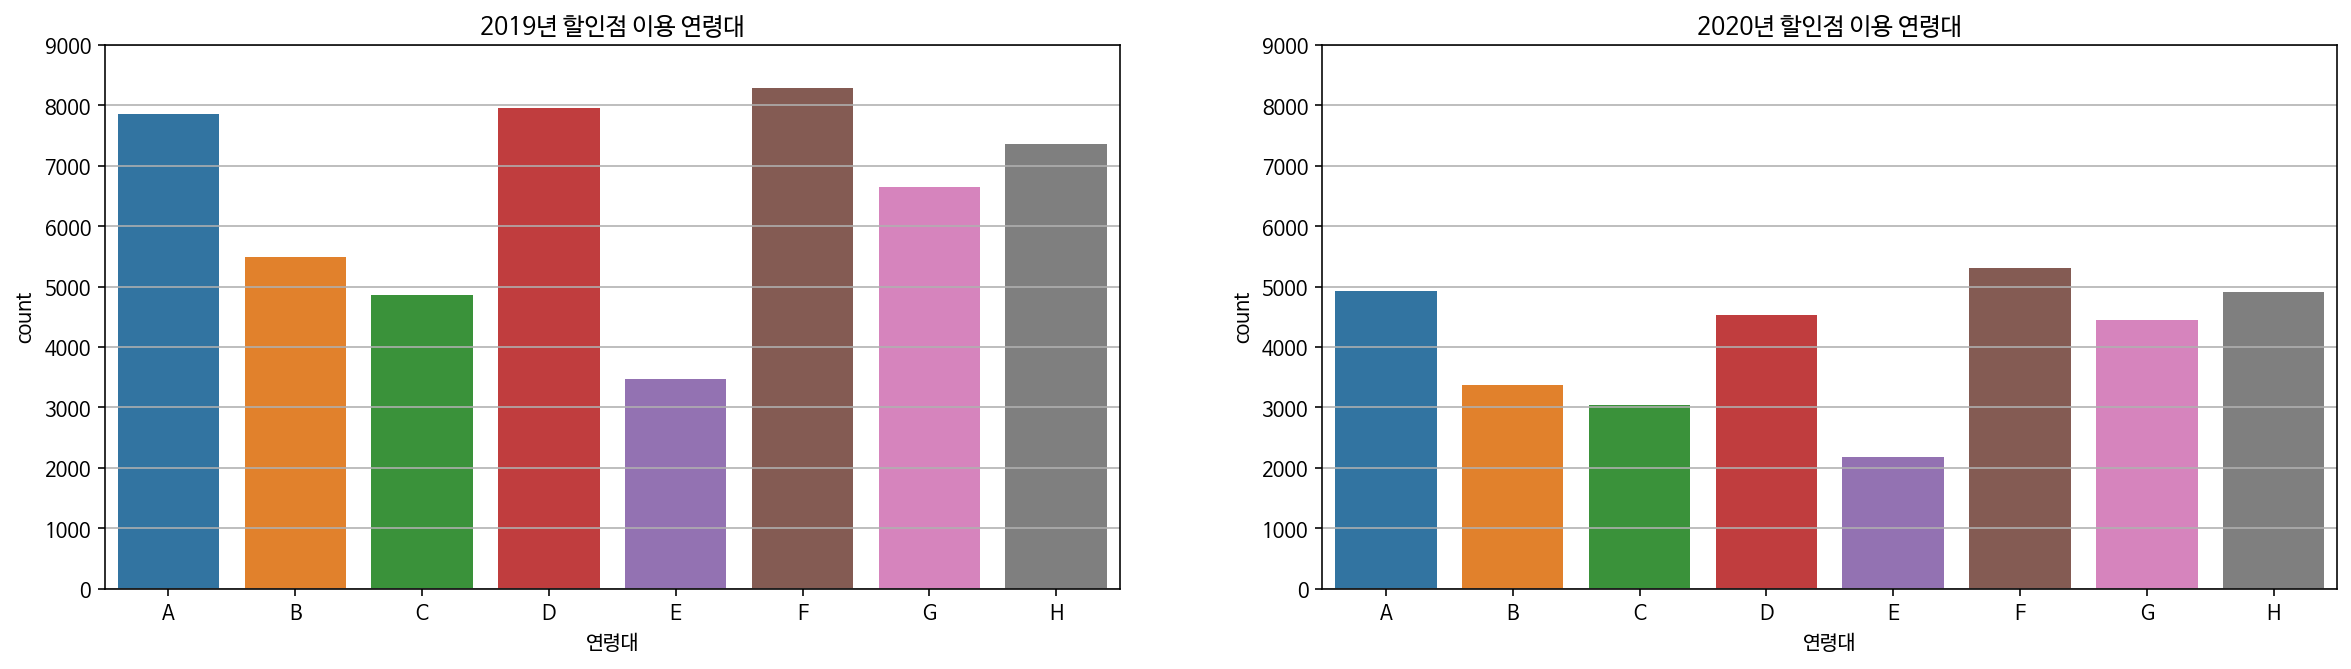

In [ ]:
###2019년과 2020년에 차이가 있을까?
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.grid(True)
plt.ylim([0, 9000])
plt.title('2019년 할인점 이용 연령대')
sns.countplot(trend2019[trend2019['Category']=='할인점']['연령대'],order=['A','B','C','D','E','F','G','H'])
plt.subplot(122)
plt.grid(True)
plt.ylim([0, 9000])
plt.title('2020년 할인점 이용 연령대')
sns.countplot(trend2020[trend2020['Category']=='할인점']['연령대'],order=['A','B','C','D','E','F','G','H'])
### 전체적으로 줄었음. 확연히 줄어든 건 D 연령대

In [ ]:
trend2019.groupby('연령대').size()-trend2020.groupby('연령대').size()

연령대
A    3434
B    2551
C    3842
D    6892
E    7634
F    3397
G    1787
H    1565
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


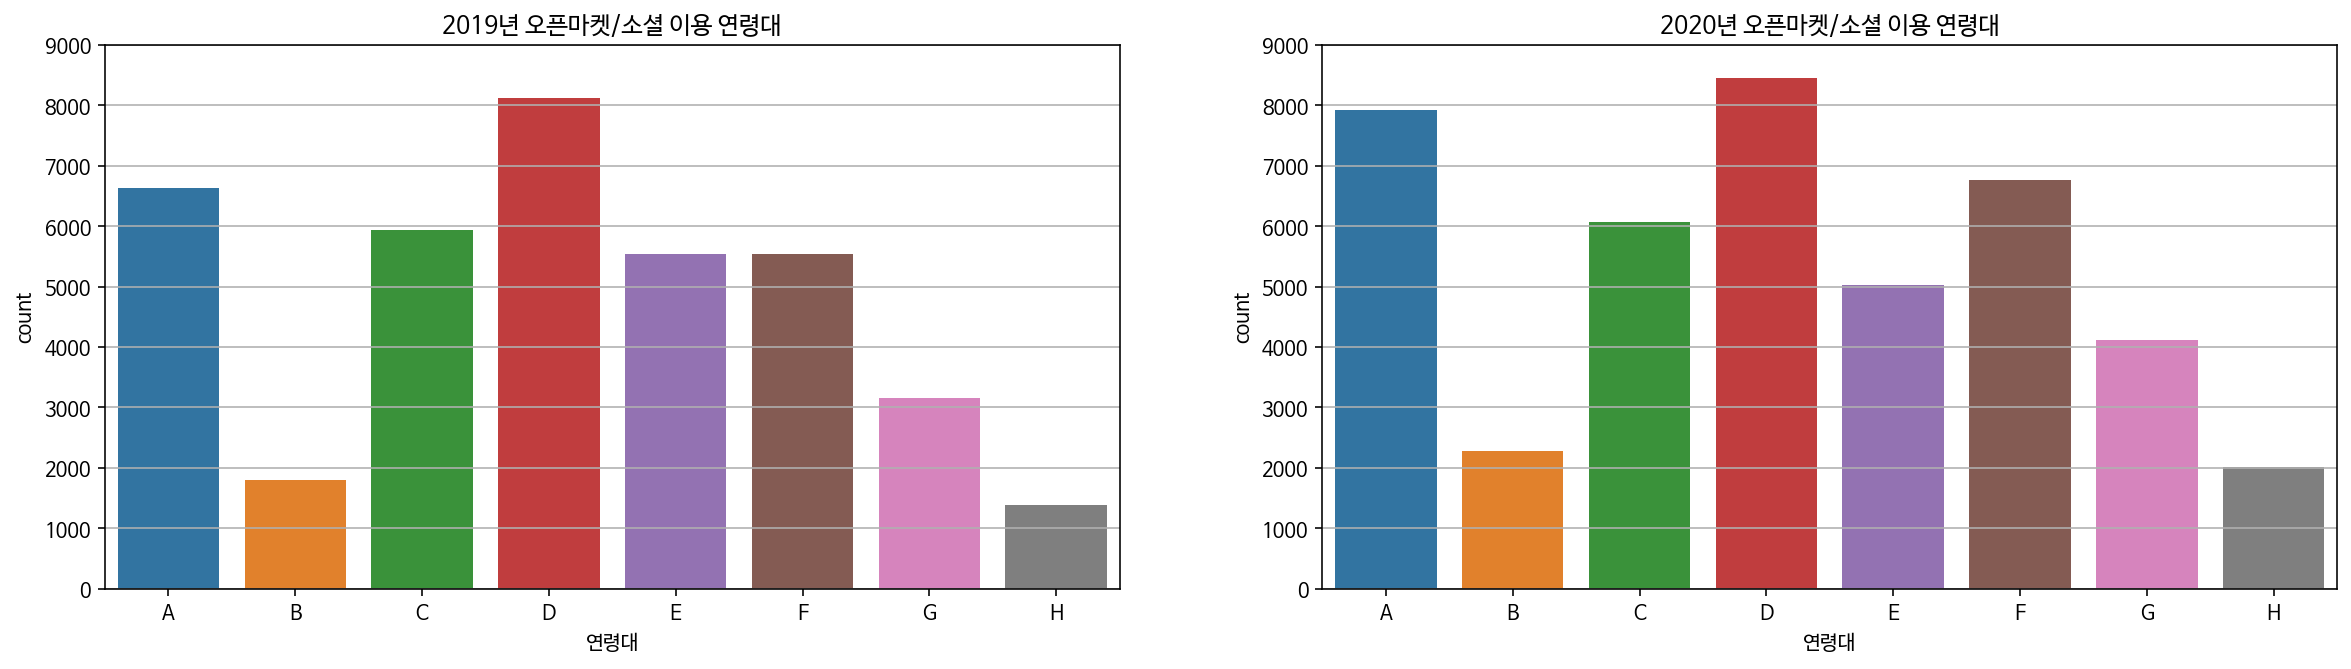

In [ ]:
###할인점 대신 오픈마켓/소셜을 이용한다면, 어떤 고객군이 넘어왔을까?
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.grid(True)
plt.ylim([0, 9000])
plt.title('2019년 오픈마켓/소셜 이용 연령대')
sns.countplot(trend2019[trend2019['Category']=='오픈마켓/소셜']['연령대'],order=['A','B','C','D','E','F','G','H'])
plt.subplot(122)
plt.grid(True)
plt.ylim([0, 9000])
plt.title('2020년 오픈마켓/소셜 이용 연령대')
sns.countplot(trend2020[trend2020['Category']=='오픈마켓/소셜']['연령대'],order=['A','B','C','D','E','F','G','H'])
### F연령대가 많이 증가한듯

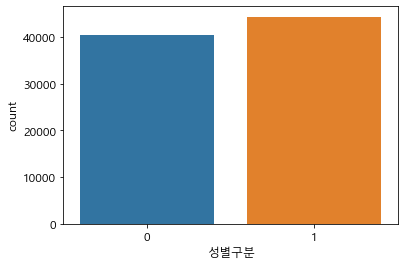

In [ ]:
sns.countplot(trend[trend['Category']=='할인점']['성별구분'])

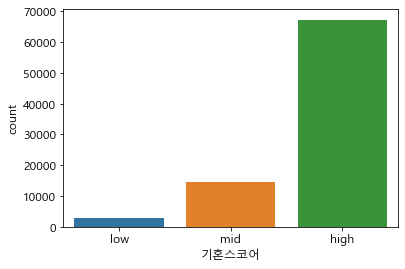

In [ ]:
sns.countplot(trend[trend['Category']=='할인점']['기혼스코어'],order=['low','mid','high'])

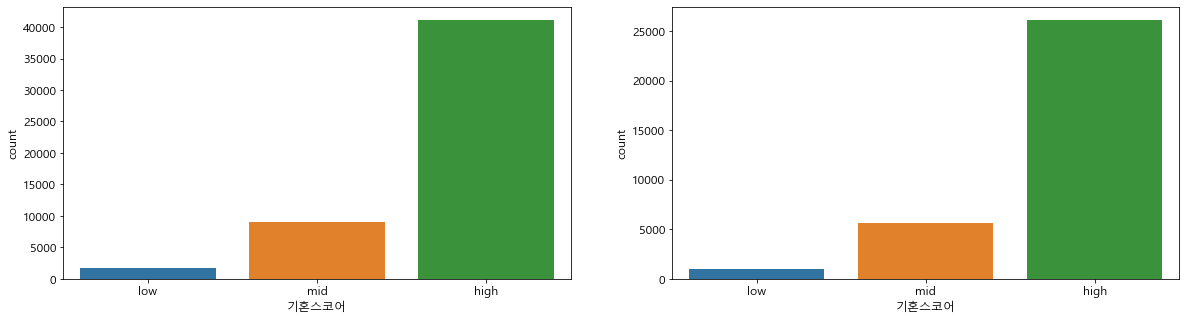

In [ ]:
###할인점을 이용하는 기혼스코어가 2019년과 2020년에 차이가 있을까?
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(trend2019[trend2019['Category']=='할인점']['기혼스코어'],order=['low','mid','high'])
plt.subplot(122)
sns.countplot(trend2020[trend2020['Category']=='할인점']['기혼스코어'],order=['low','mid','high'])
### 비율은 차이 없고 절대적인 수만 감소

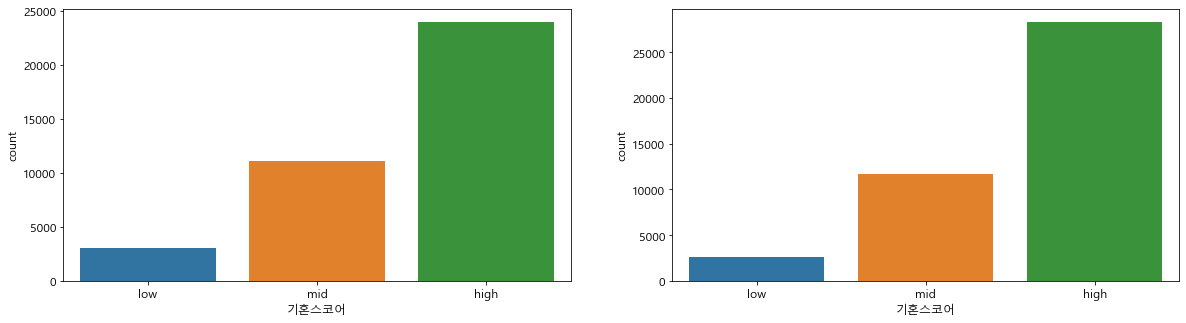

In [ ]:
###오픈마켓을 이용하는 기혼스코어가 2019년과 2020년에 차이가 있을까?
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(trend2019[trend2019['Category']=='오픈마켓/소셜']['기혼스코어'],order=['low','mid','high'])
plt.subplot(122)
sns.countplot(trend2020[trend2020['Category']=='오픈마켓/소셜']['기혼스코어'],order=['low','mid','high'])
### 거의 비슷함--차이 없음

## 온라인/오프라인 비교

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


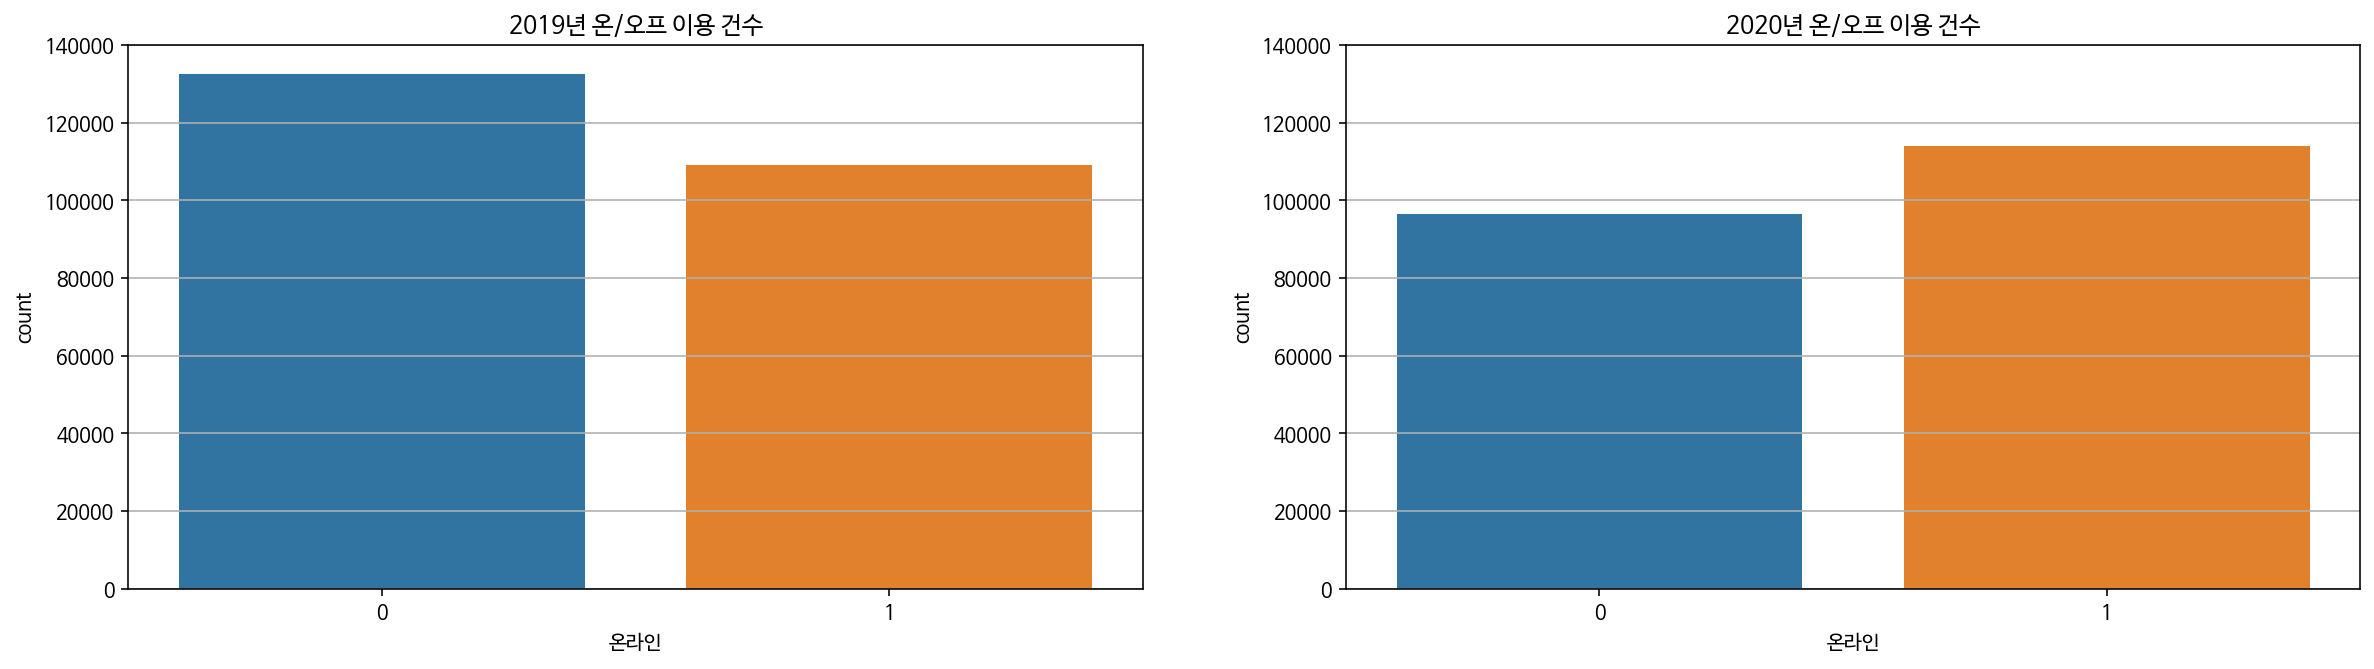

In [ ]:
#2019년 2020년 온/오프 비교
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.grid(True)
plt.ylim([0, 140000])
plt.title('2019년 온/오프 이용 건수')
sns.countplot(trend2019['온라인'])
plt.subplot(122)
plt.grid(True)
plt.ylim([0, 140000])
plt.title('2020년 온/오프 이용 건수')
sns.countplot(trend2020['온라인'])
###오프라인은 감소, 온라인 증가. 오프라인의 감소폭이 더 큼

## 연령대별 인사이트

In [ ]:
trend.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,온라인
0,202005,할인점,0,F,high,low,high,mid,low,low,0
1,202005,취미,0,B,high,low,mid,mid,low,low,0
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid,1
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low,0
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


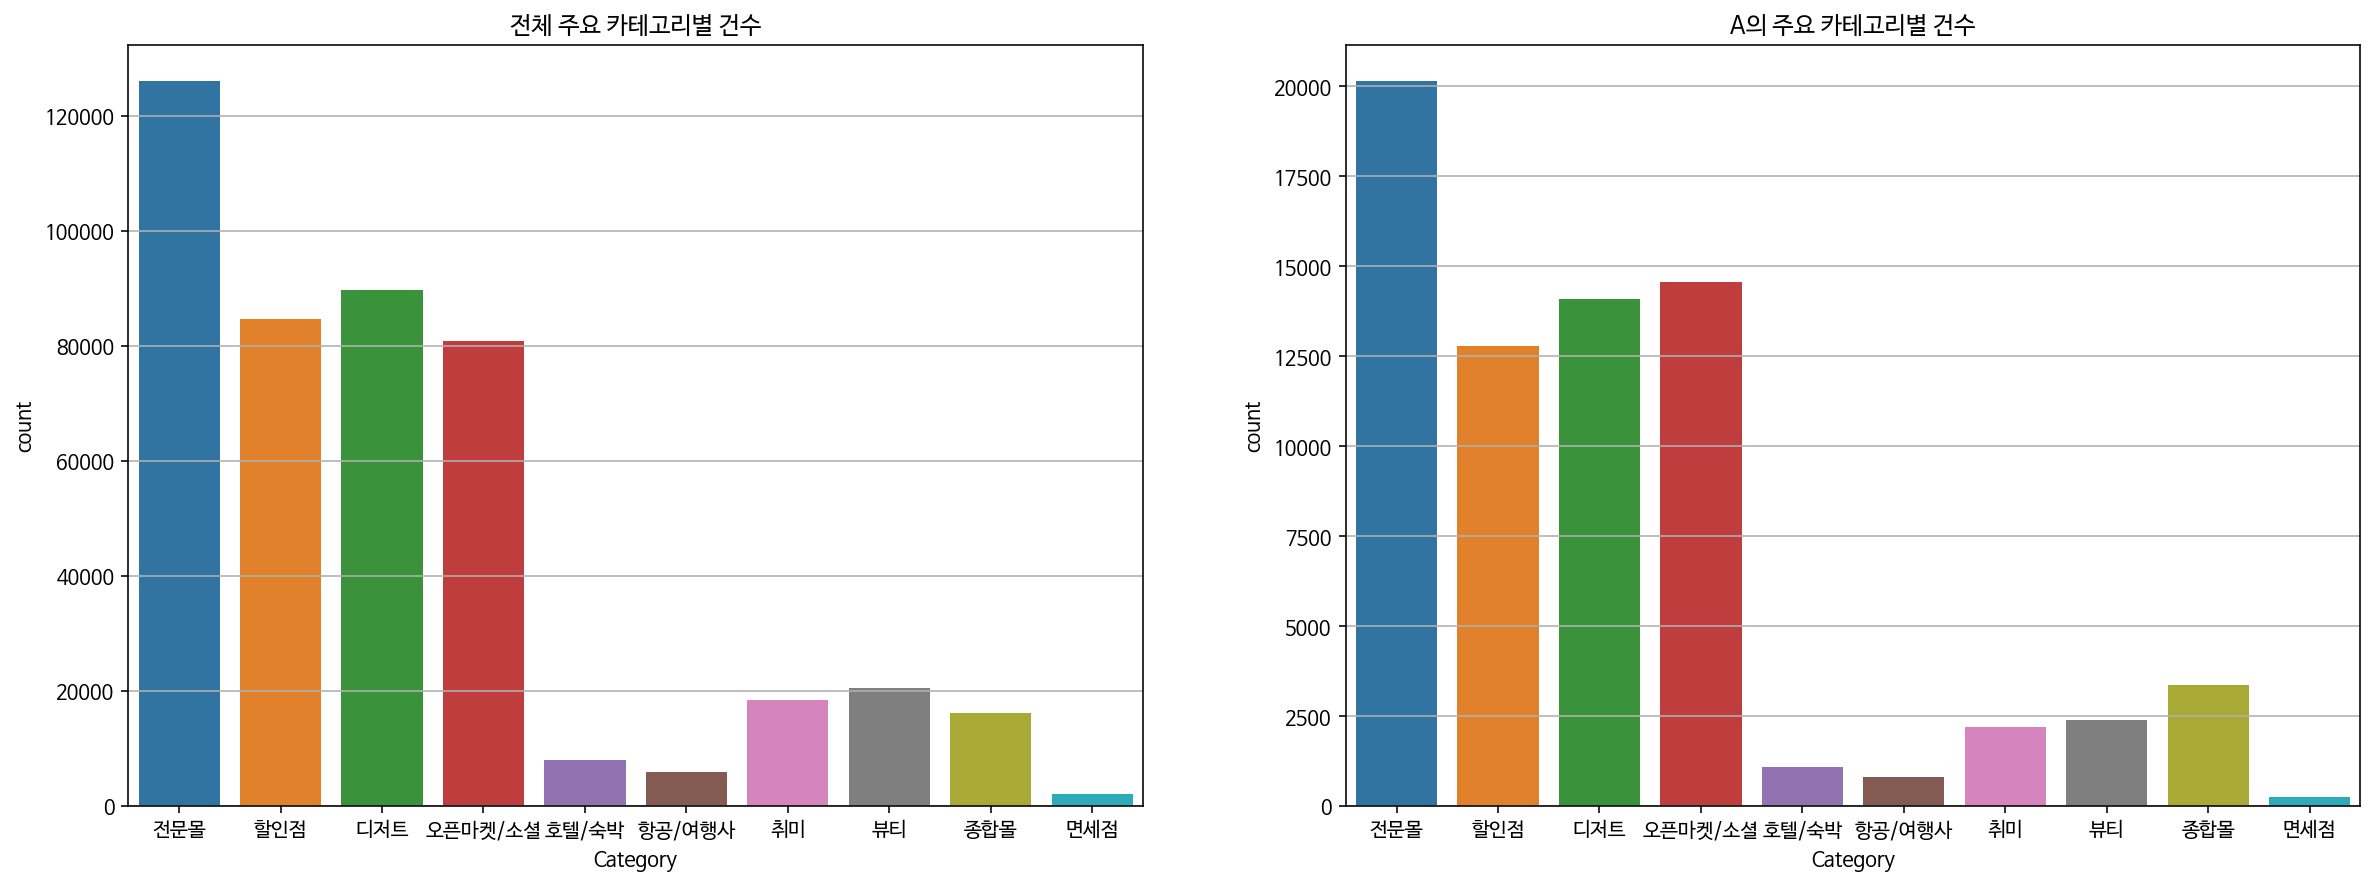

In [ ]:
A = trend[trend['연령대']=='A']
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체 주요 카테고리별 건수')
plt.grid(True)
sns.countplot(trend['Category'],order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
plt.subplot(122)
plt.title('A의 주요 카테고리별 건수')
plt.grid(True)
sns.countplot(A['Category'],order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

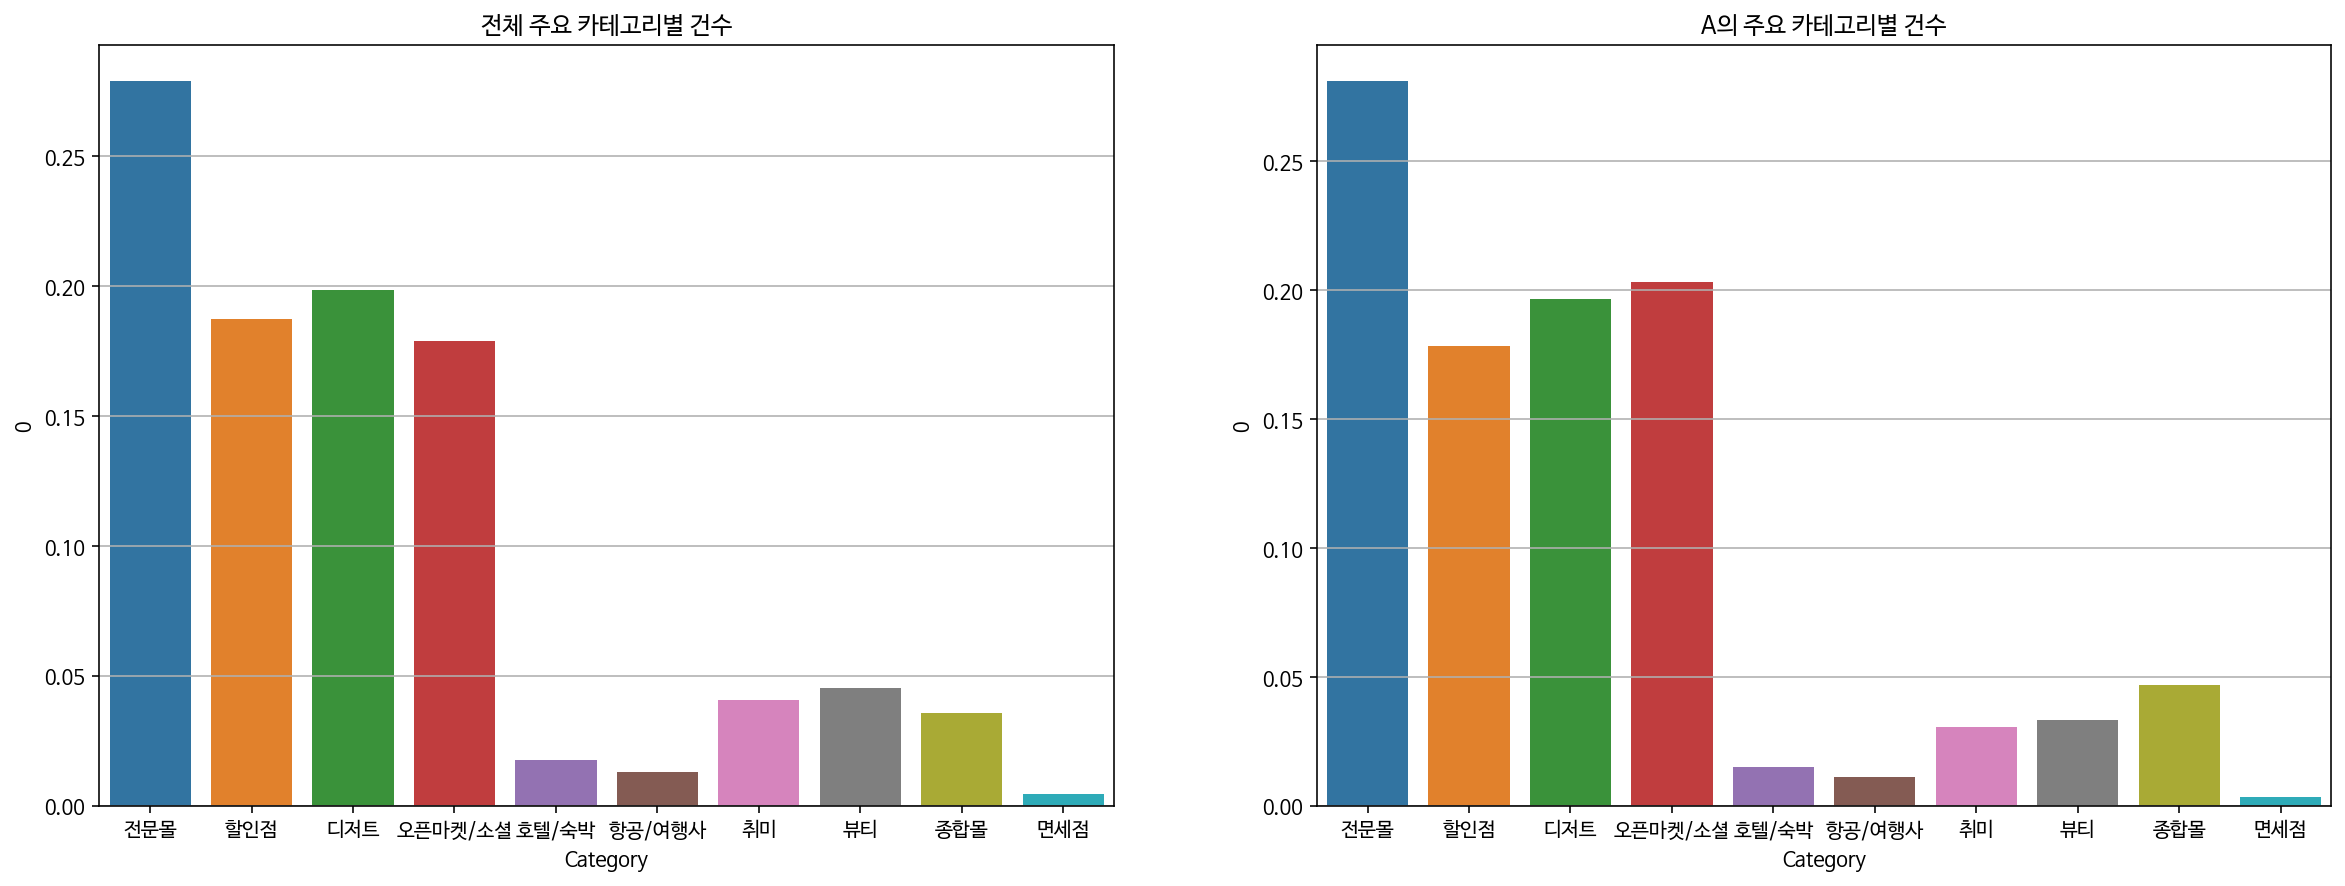

In [ ]:
A = trend[trend['연령대']=='A']
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(trend.groupby('Category').size()/len(trend)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
plt.subplot(122)
plt.title('A의 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(A.groupby('Category').size()/len(A)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

In [ ]:
pd.DataFrame(A.groupby('Category').size()/len(A)).reset_index()

,Category,0
0,디저트,0.196622
1,면세점,0.003518
2,뷰티,0.033180
3,오픈마켓/소셜,0.203308
4,전문몰,0.281253
5,종합몰,0.046762
6,취미,0.030653
7,할인점,0.178406
8,항공/여행사,0.011153
9,호텔/숙박,0.015145


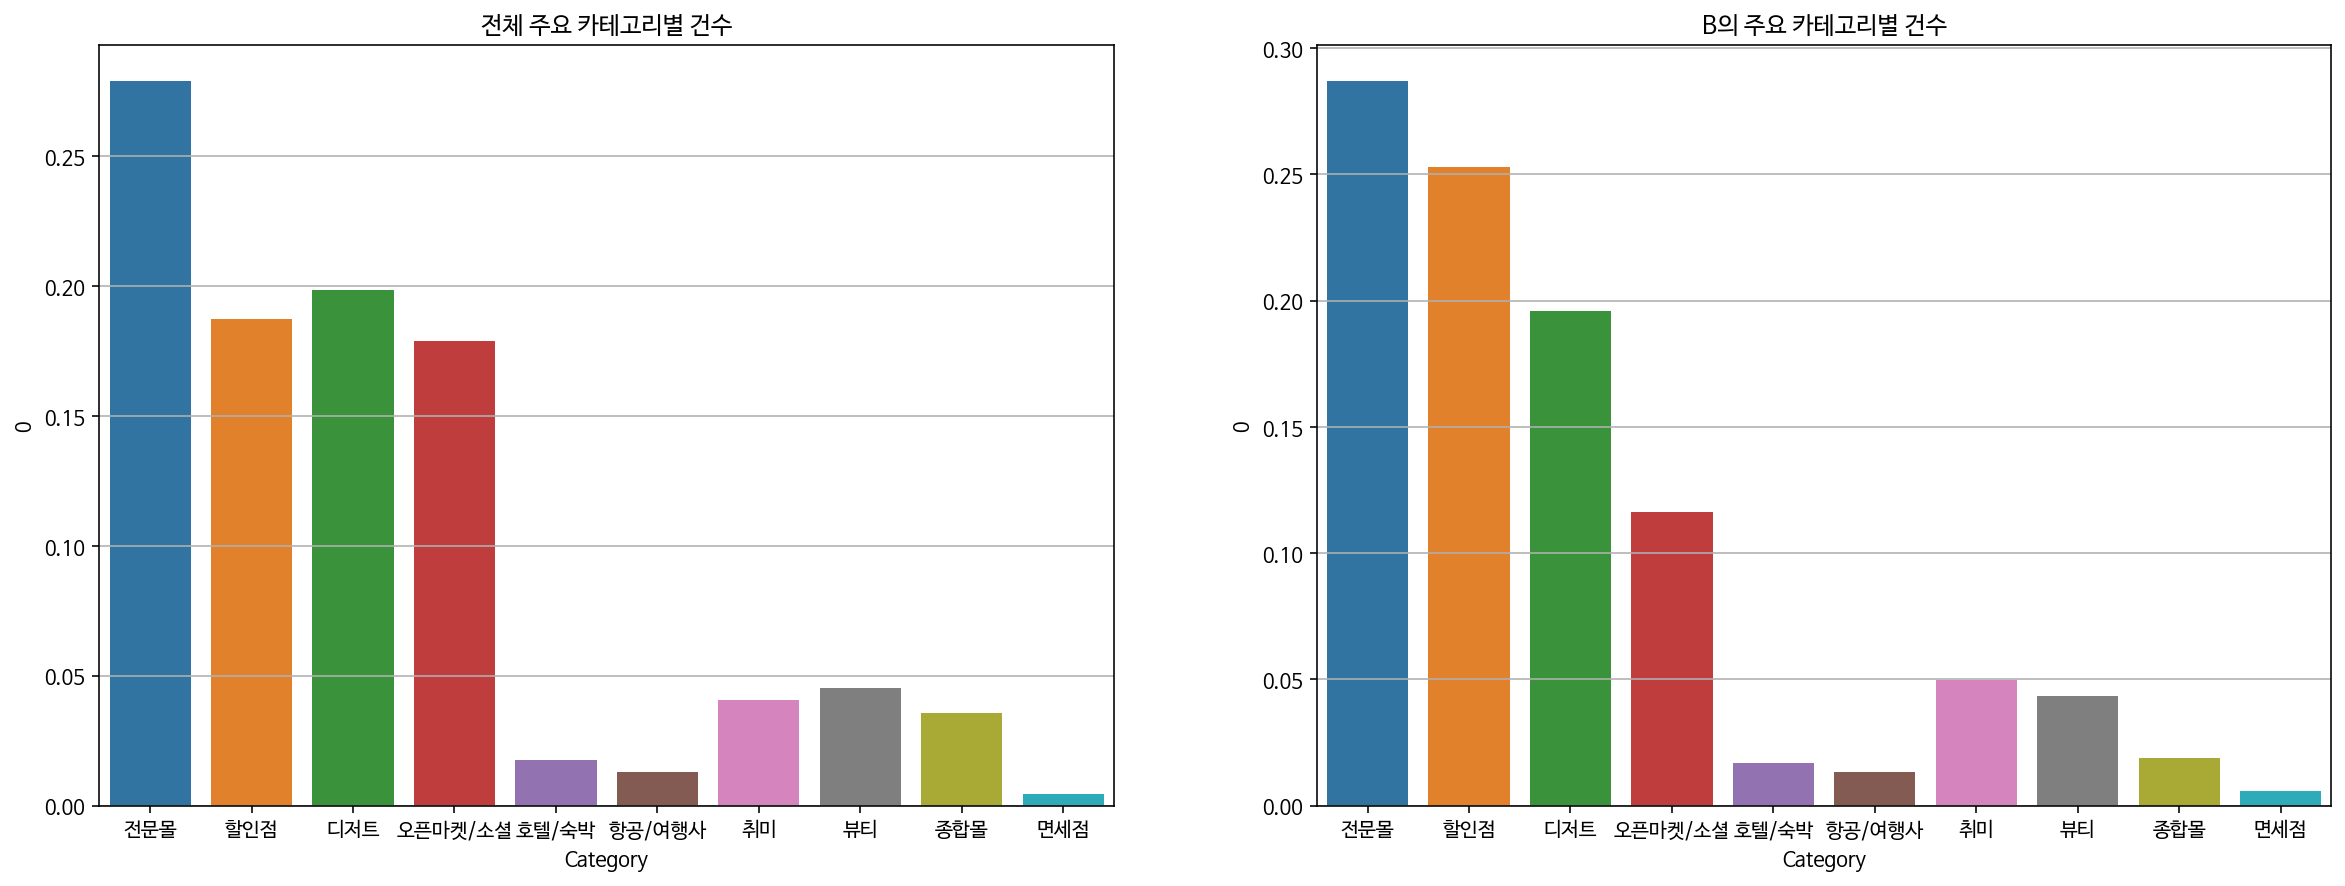

In [ ]:
B = trend[trend['연령대']=='B']
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(trend.groupby('Category').size()/len(trend)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
plt.subplot(122)
plt.title('B의 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(B.groupby('Category').size()/len(B)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

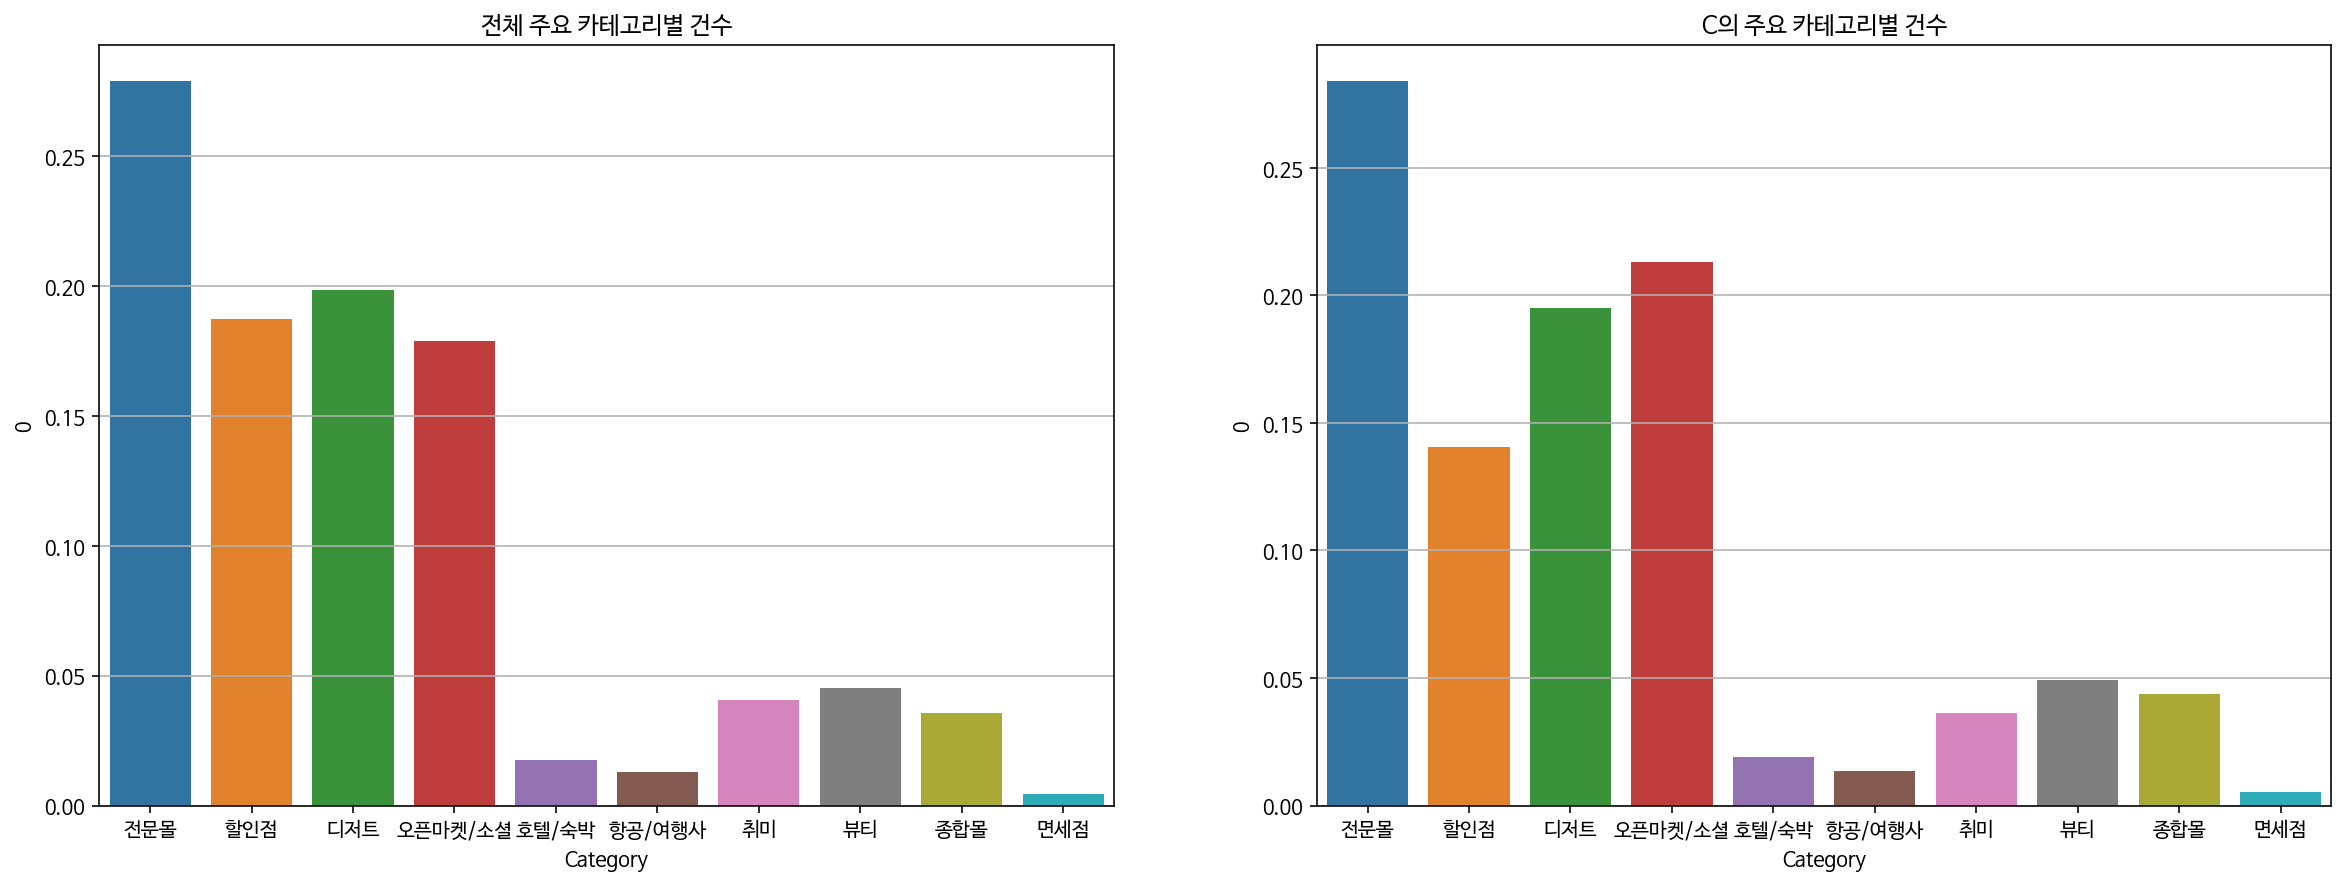

In [ ]:
C = trend[trend['연령대']=='C']
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(trend.groupby('Category').size()/len(trend)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
plt.subplot(122)
plt.title('C의 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(C.groupby('Category').size()/len(C)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

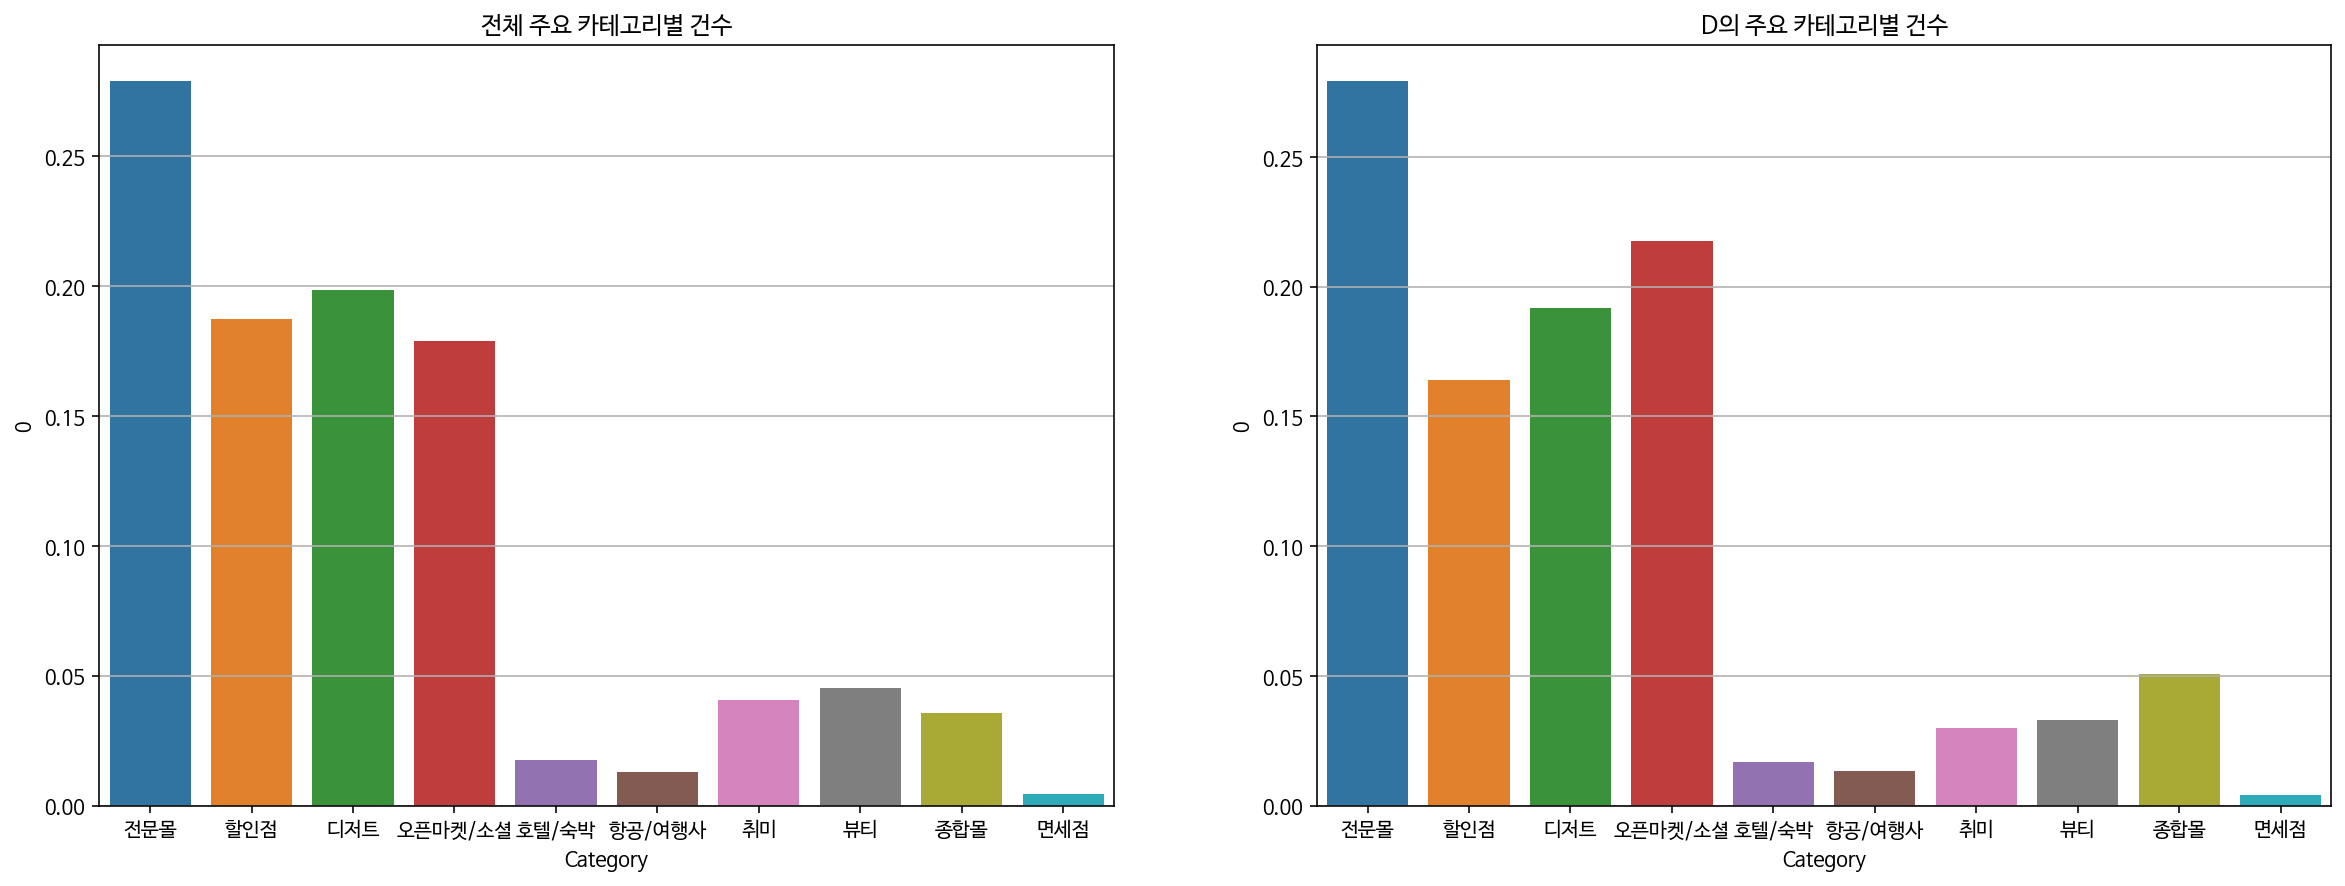

In [ ]:
D = trend[trend['연령대']=='D']
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(trend.groupby('Category').size()/len(trend)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
plt.subplot(122)
plt.title('D의 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(D.groupby('Category').size()/len(D)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

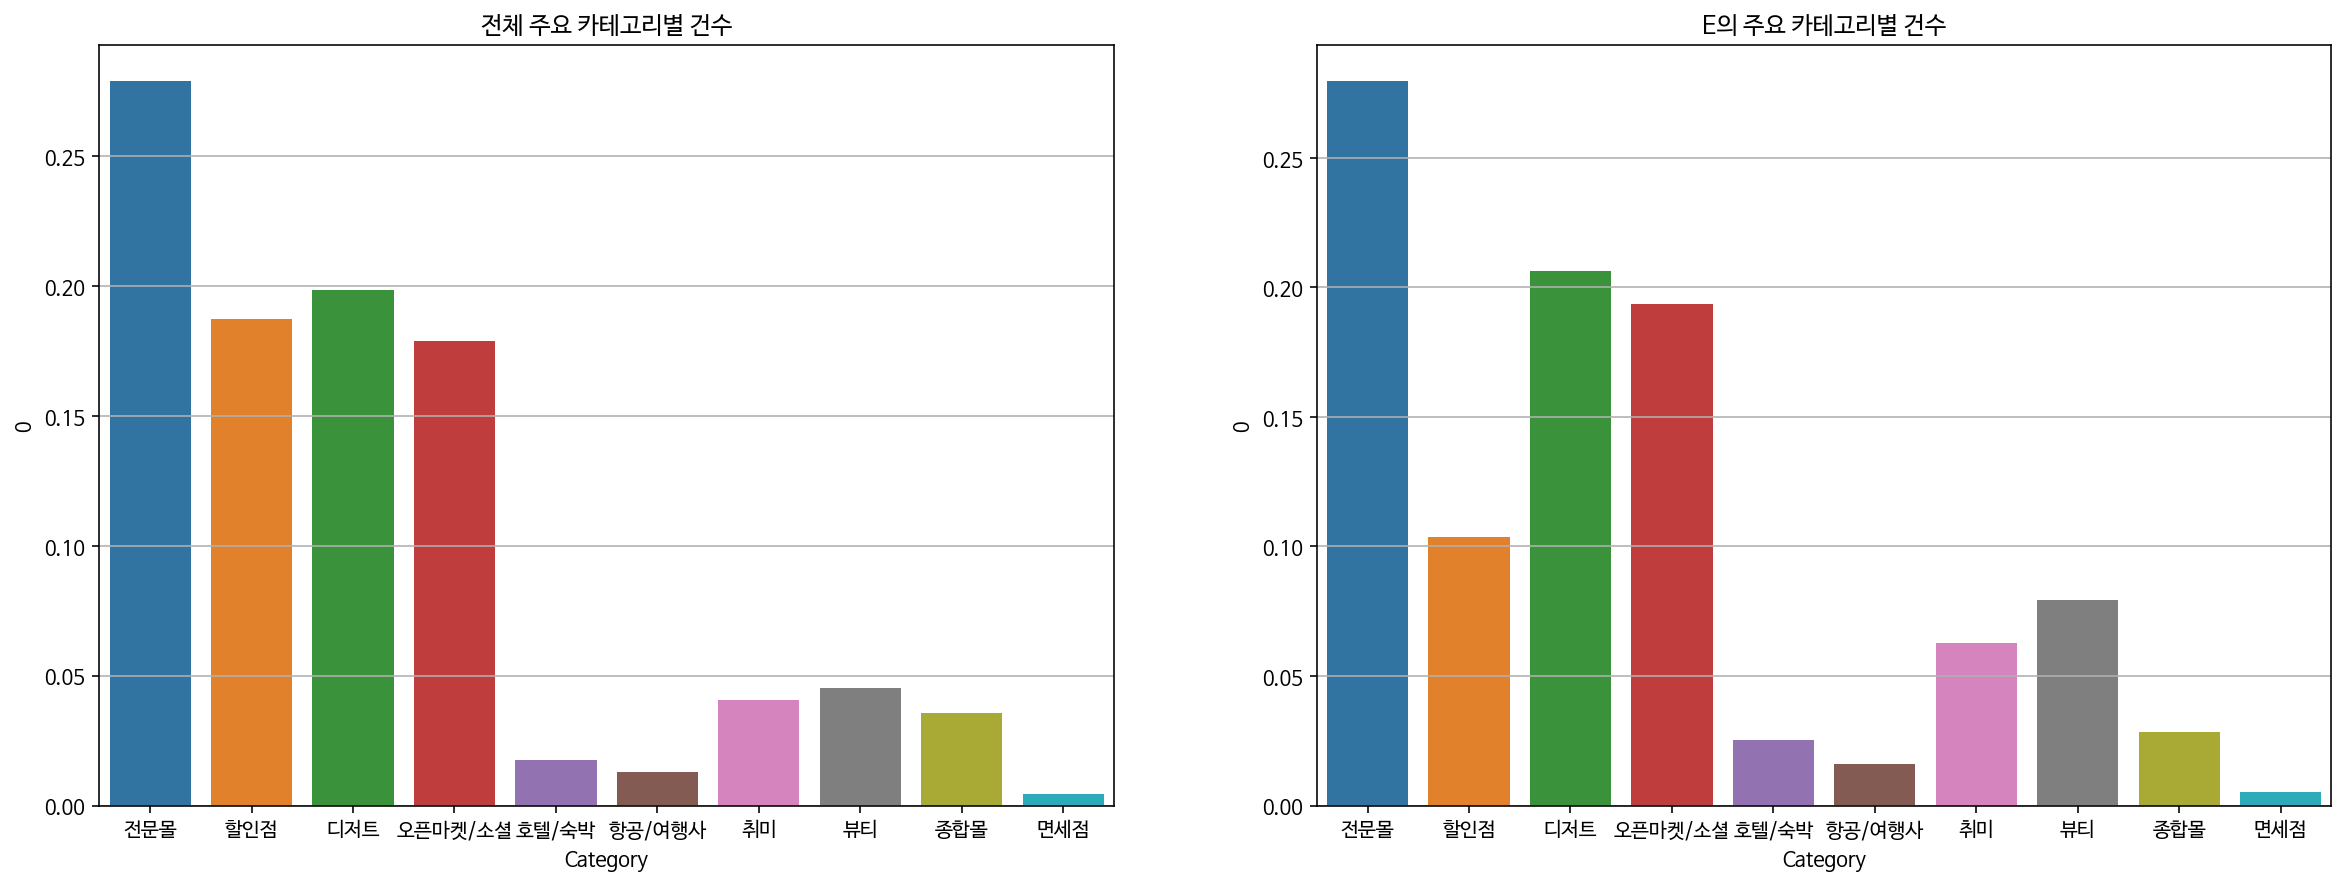

In [ ]:
E = trend[trend['연령대']=='E']
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(trend.groupby('Category').size()/len(trend)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
plt.subplot(122)
plt.title('E의 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(E.groupby('Category').size()/len(E)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

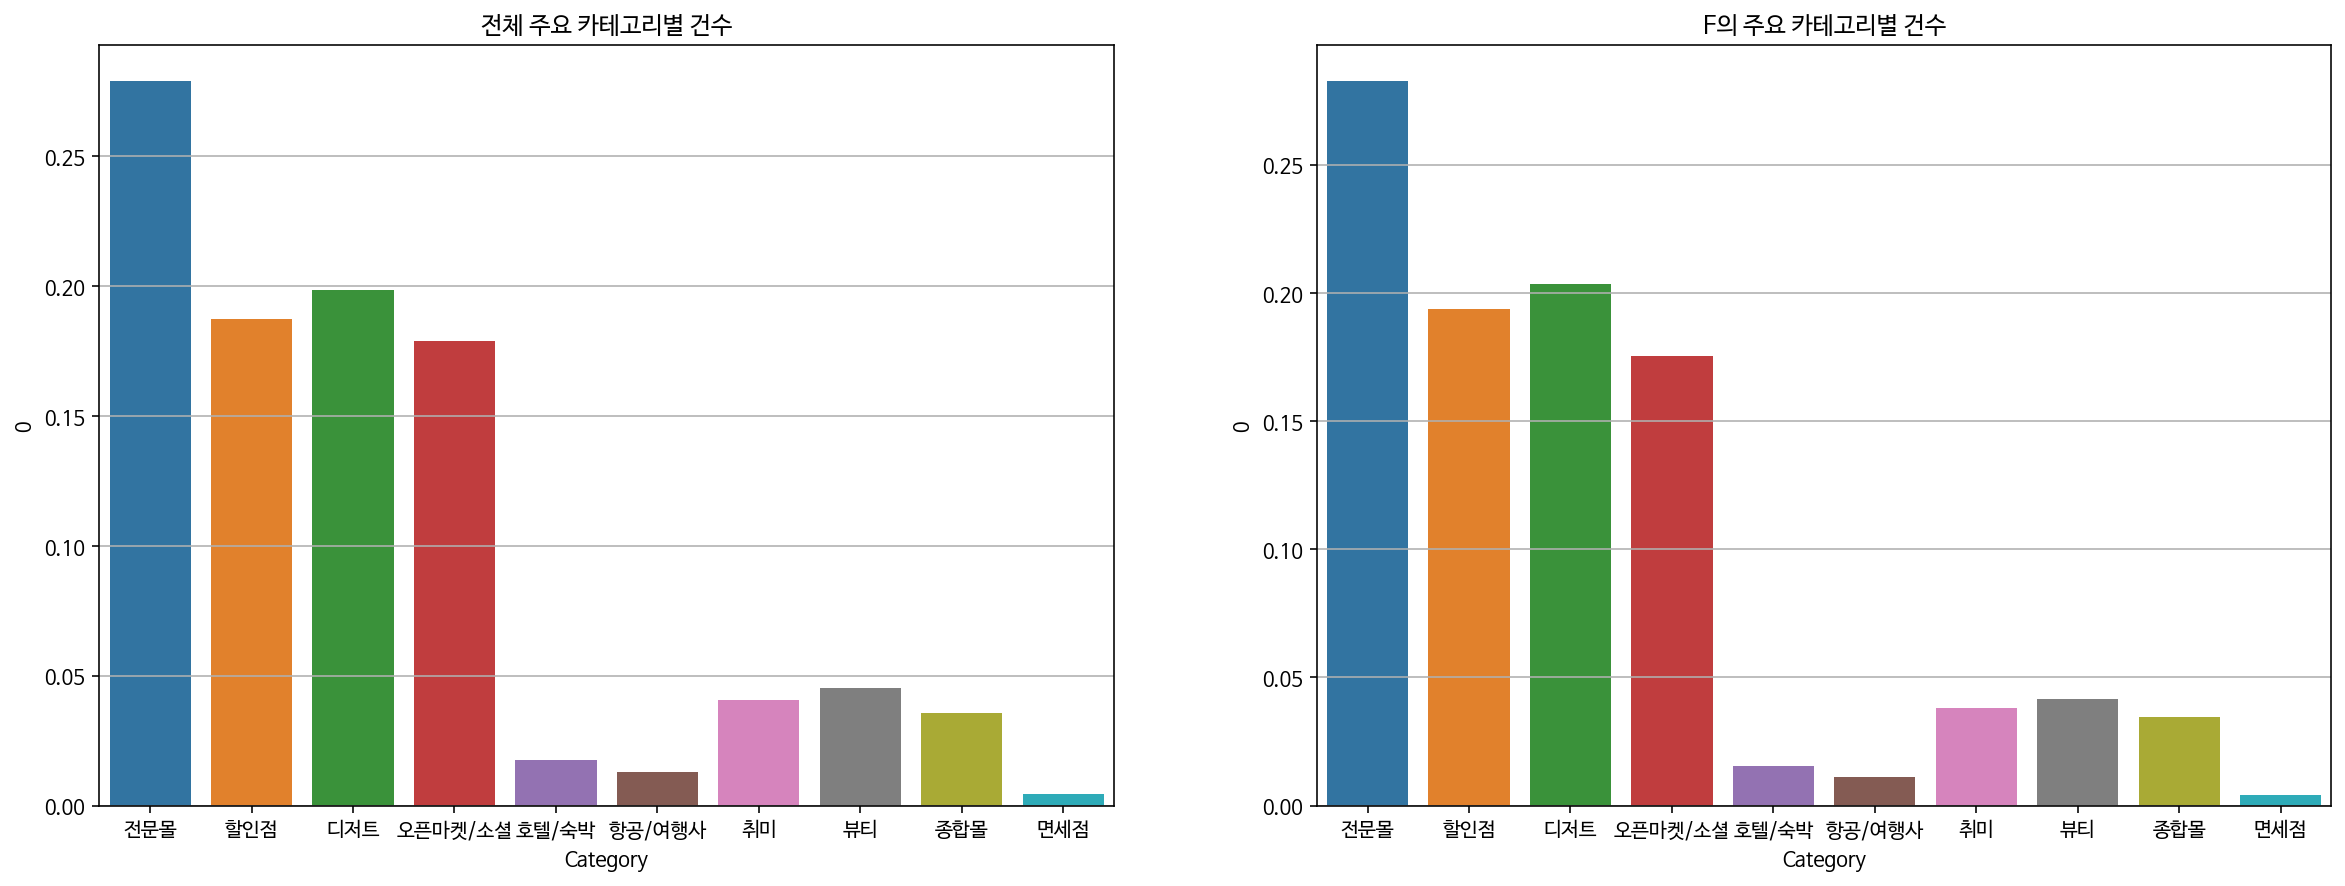

In [ ]:
F = trend[trend['연령대']=='F']
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(trend.groupby('Category').size()/len(trend)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
plt.subplot(122)
plt.title('F의 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(F.groupby('Category').size()/len(F)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

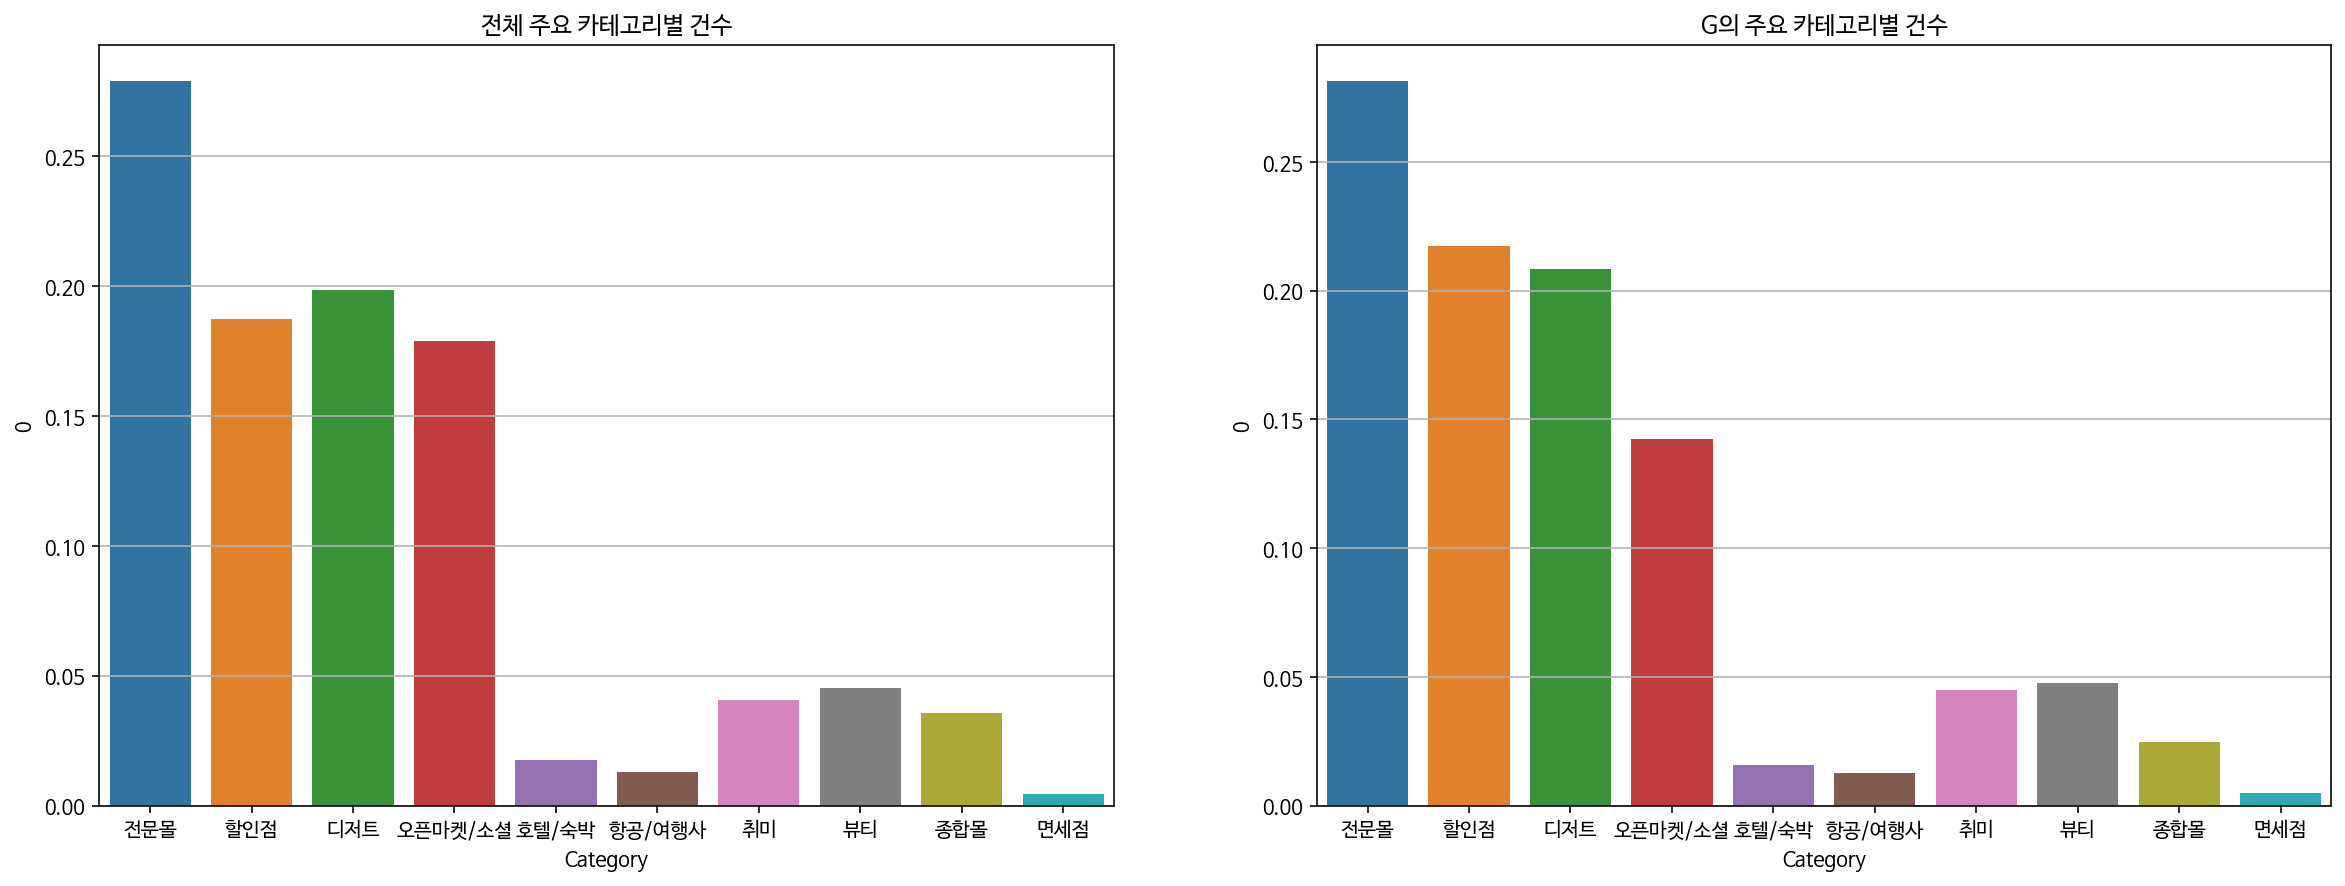

In [ ]:
G = trend[trend['연령대']=='G']
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(trend.groupby('Category').size()/len(trend)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
plt.subplot(122)
plt.title('G의 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(G.groupby('Category').size()/len(G)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

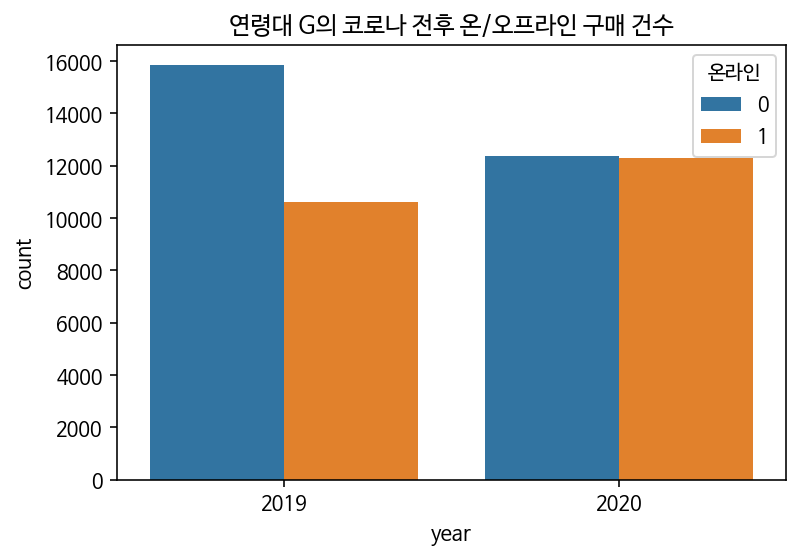

In [ ]:
sns.countplot(data=G, x='year', hue='온라인')
plt.title('연령대 G의 코로나 전후 온/오프라인 구매 건수')
plt.show()

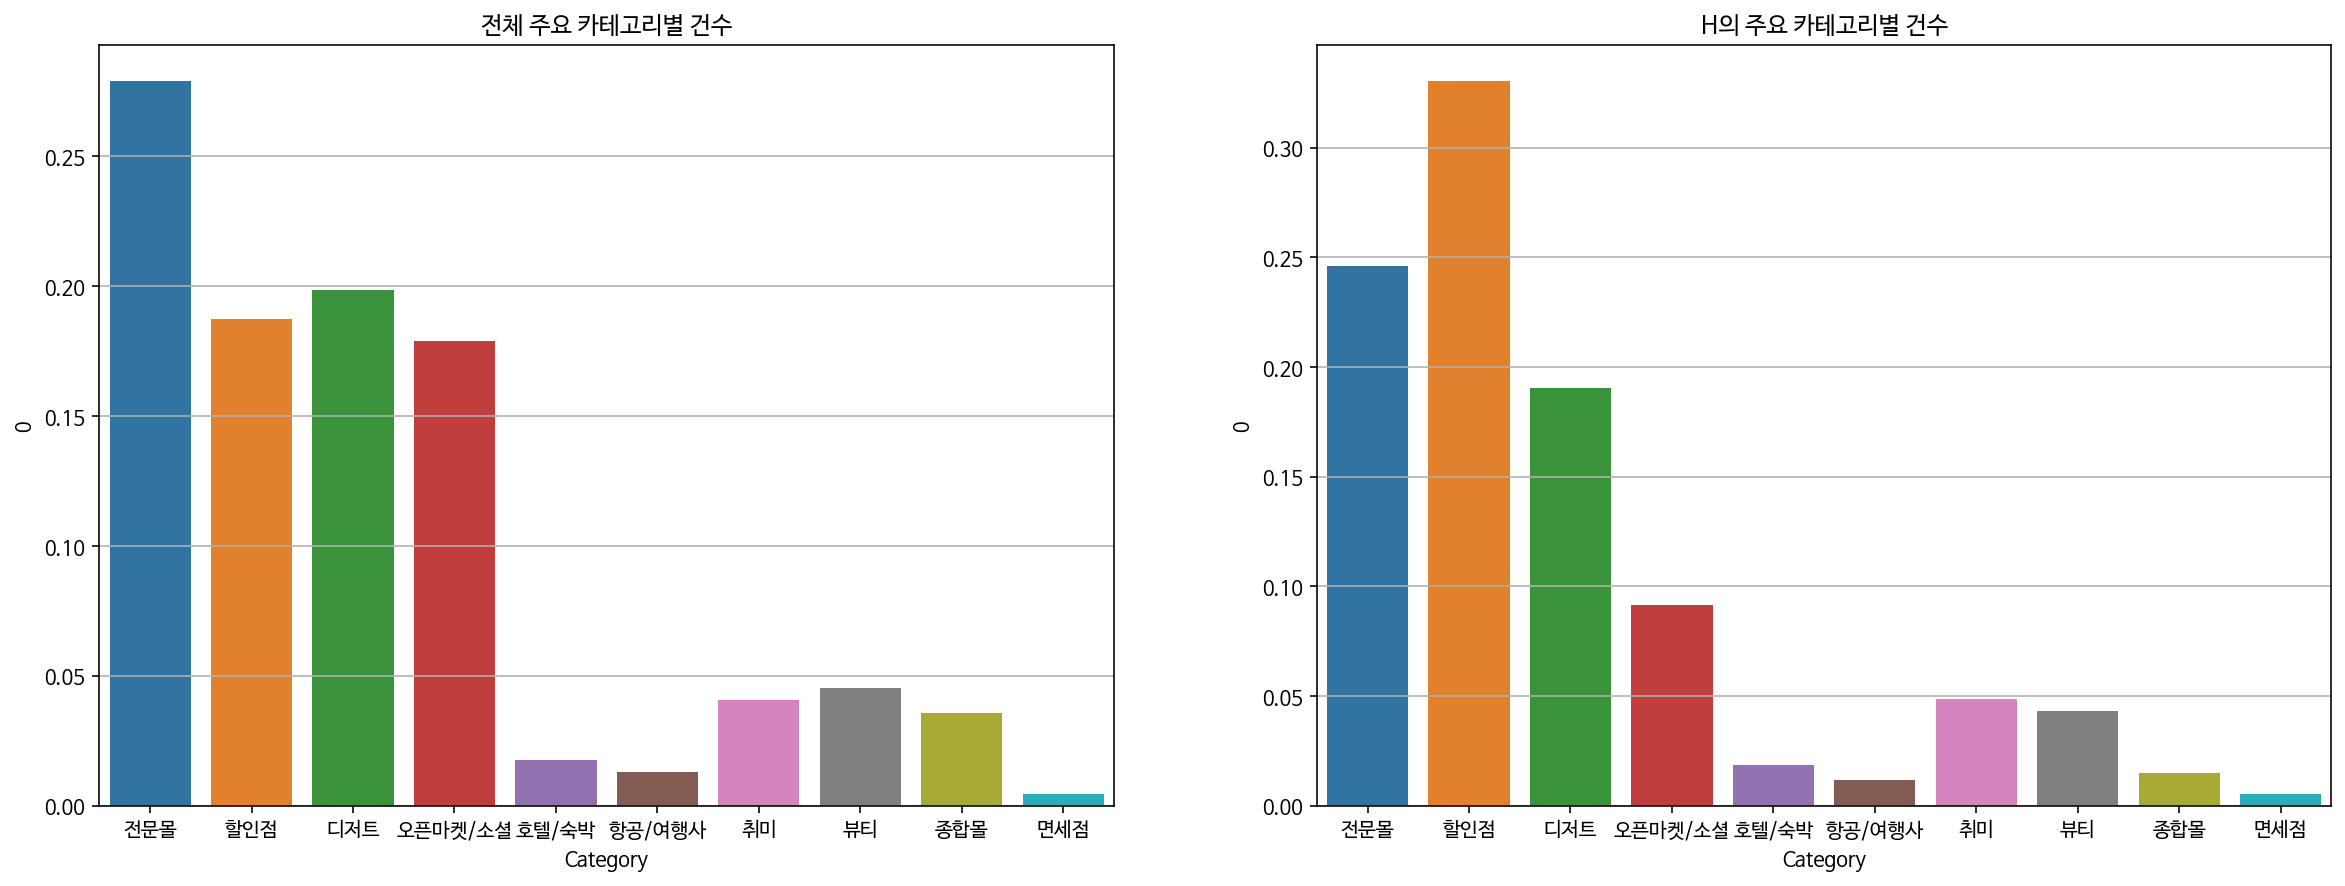

In [ ]:
H = trend[trend['연령대']=='H']
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(trend.groupby('Category').size()/len(trend)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
plt.subplot(122)
plt.title('H의 주요 카테고리별 건수')
plt.grid(True)
sns.barplot(data=pd.DataFrame(H.groupby('Category').size()/len(H)).reset_index(), x='Category',y=0,order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

## 클러스터링 시도

In [11]:
df = trend.copy()
df['연령대']=df['연령대'].apply(lambda x:1 if (x=='E') else (2 if(x=='C') else (3 if(x=='D') else (4 if(x=='A') else (5 if (x=='F') else (6 if(x=='G') else (7 if(x=='B') else 8)))))))
df['기혼스코어']=df['기혼스코어'].apply(lambda x: 1 if (x=='low') else (2 if (x=='mid') else 3))
df['유아자녀스코어']=df['유아자녀스코어'].apply(lambda x: 1 if (x=='low') else (2 if (x=='mid') else 3))
df['초등학생자녀스코어']=df['초등학생자녀스코어'].apply(lambda x: 1 if (x=='low') else (2 if (x=='mid') else 3))
df['중고생자녀스코어']=df['중고생자녀스코어'].apply(lambda x: 1 if (x=='low') else (2 if (x=='mid') else 3))
df['대학생자녀스코어']=df['대학생자녀스코어'].apply(lambda x: 1 if (x=='low') else (2 if (x=='mid') else 3))
df['전업주부스코어']=df['전업주부스코어'].apply(lambda x: 1 if (x=='low') else (2 if (x=='mid') else 3))
df

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,year,온라인
0,202005,할인점,0,5,3,1,3,2,1,1,2020,0
1,202005,취미,0,7,3,1,2,2,1,1,2020,0
2,202005,오픈마켓/소셜,1,3,2,2,2,2,1,2,2020,1
3,202005,뷰티,0,3,2,2,2,2,1,1,2020,0
4,202005,오픈마켓/소셜,0,6,3,1,2,2,2,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,1,1,2,1,1,1,1,2019,1
452034,201904,할인점,0,8,3,1,1,1,1,1,2019,0
452035,201904,할인점,1,8,3,1,1,1,1,1,2019,0
452036,201904,할인점,0,8,3,1,1,1,1,1,2019,0


In [12]:
df2019 = df[df['YM']<202000]
df2020 = df[df['YM']>=202000]

In [13]:
important = ['성별구분', '연령대', '기혼스코어','유아자녀스코어','초등학생자녀스코어','중고생자녀스코어','대학생자녀스코어','전업주부스코어']
df[important]

,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,0,5,3,1,3,2,1,1
1,0,7,3,1,2,2,1,1
2,1,3,2,2,2,2,1,2
3,0,3,2,2,2,2,1,1
4,0,6,3,1,2,2,2,1
...,...,...,...,...,...,...,...,...
452033,0,1,1,2,1,1,1,1
452034,0,8,3,1,1,1,1,1
452035,1,8,3,1,1,1,1,1
452036,0,8,3,1,1,1,1,1


In [14]:
from sklearn.cluster import KMeans

df1 = df.copy()

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit_predict(df1[important])

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


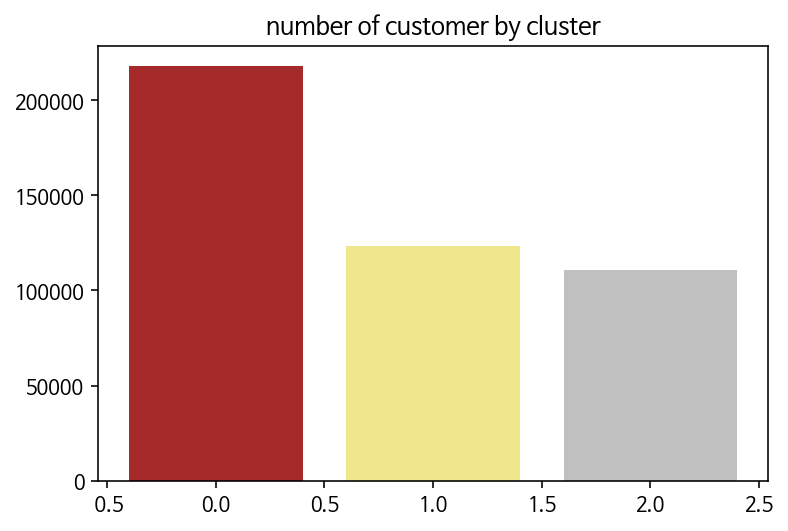

In [15]:
clst_label, clst_cust_counts = np.unique(kmeans.labels_, return_counts=True)
colors3=['brown', 'khaki','silver']
plt.bar(clst_label, clst_cust_counts, color=colors3)
plt.title('number of customer by cluster')
plt.show()

In [16]:
df2 = df1.copy()
df2['clst']=kmeans.labels_
df2.groupby('clst').mean()

,YM,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,year,온라인
clst,,,,,,,,,,,
0,201951.356973,0.518562,3.972800,2.820065,1.664136,1.937288,2.132305,1.235106,1.547708,2019.468467,0.524299
1,201952.115271,0.520096,6.886522,3.000000,1.000000,1.997996,1.704571,1.453246,1.500337,2019.476049,0.412120
2,201949.344586,0.570277,1.508928,1.834224,1.939210,1.629355,1.000000,1.000000,1.567492,2019.448355,0.521990


In [39]:
target = df2.groupby('clst').mean()

In [47]:
target.iloc[:,[1,2,3,4,5,6,7,8,10]]

,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,온라인
clst,,,,,,,,,
0,0.518562,3.972800,2.820065,1.664136,1.937288,2.132305,1.235106,1.547708,0.524299
1,0.520096,6.886522,3.000000,1.000000,1.997996,1.704571,1.453246,1.500337,0.412120
2,0.570277,1.508928,1.834224,1.939210,1.629355,1.000000,1.000000,1.567492,0.521990


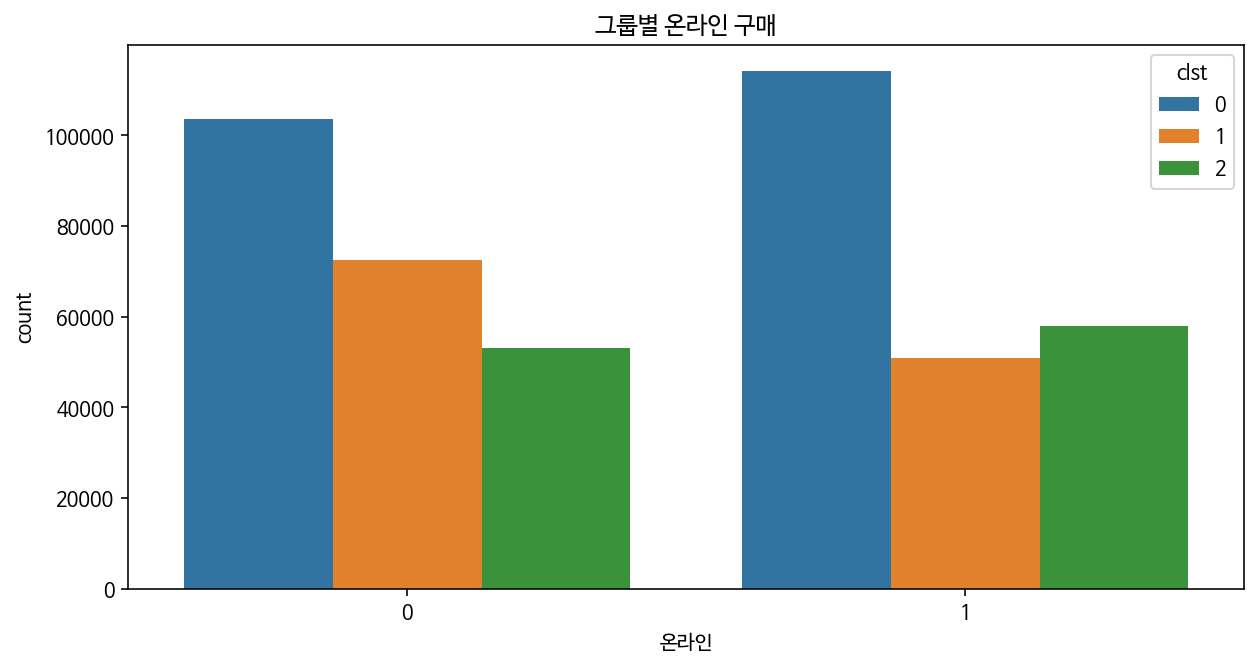

In [48]:
# 타겟유무에 따른 카테고리별 구매 
plt.figure(figsize=(10,5))
sns.countplot(data=df2, x='온라인', hue='clst')
plt.title("그룹별 온라인 구매")
plt.show()

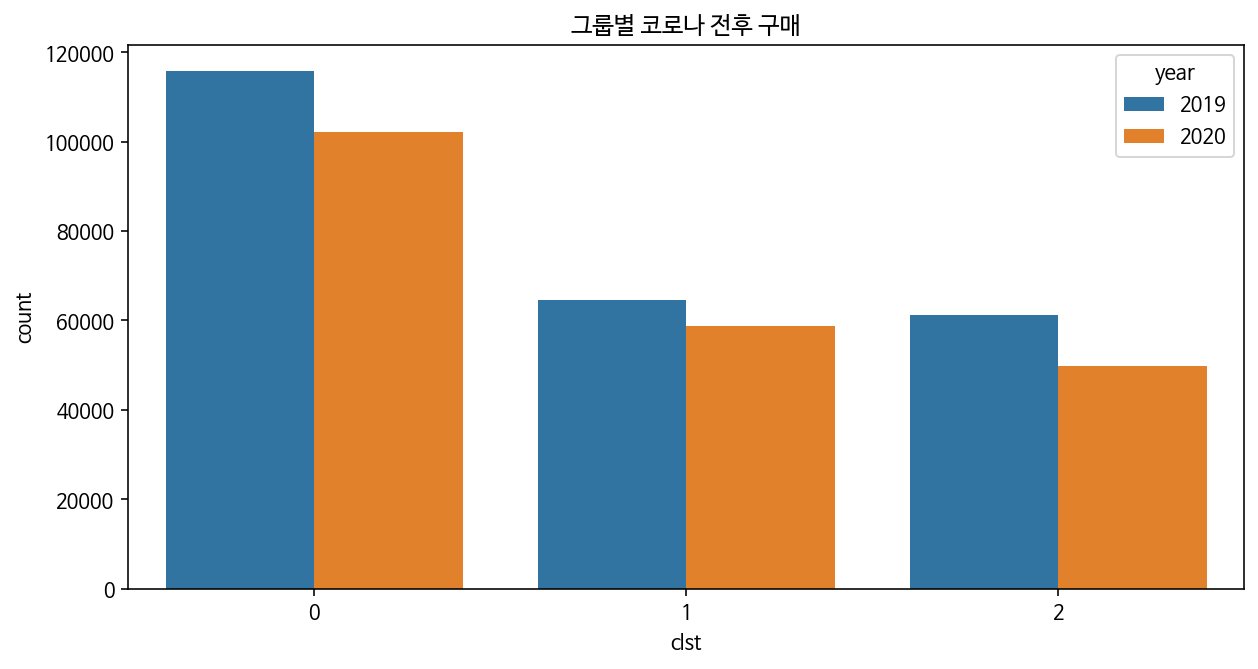

In [51]:
# 타겟유무에 따른 카테고리별 구매 
plt.figure(figsize=(10,5))
sns.countplot(data=df2, x='clst', hue='year')
plt.title("그룹별 코로나 전후 구매")
plt.show()

### 클러스터 2 분석

In [17]:
cl2 = df2[(df2['clst']==2)]

In [18]:
cl2_19 = cl2[cl2['year']==2019]
cl2_20 = cl2[cl2['year']==2020]

In [21]:
cl2_20

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,year,온라인,clst
5,202005,디저트,0,1,2,1,1,1,1,1,2020,0,2
15,202005,오픈마켓/소셜,1,2,2,2,2,1,1,2,2020,1,2
18,202005,디저트,1,2,2,2,3,1,1,2,2020,0,2
24,202005,전문몰,1,2,3,3,3,1,1,3,2020,1,2
26,202005,디저트,0,1,2,2,1,1,1,1,2020,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210448,202004,오픈마켓/소셜,0,2,2,2,2,1,1,1,2020,1,2
210453,202004,전문몰,1,2,2,2,2,1,1,2,2020,1,2
210456,202004,디저트,1,1,2,2,1,1,1,2,2020,0,2
210458,202004,오픈마켓/소셜,0,1,2,2,1,1,1,1,2020,1,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


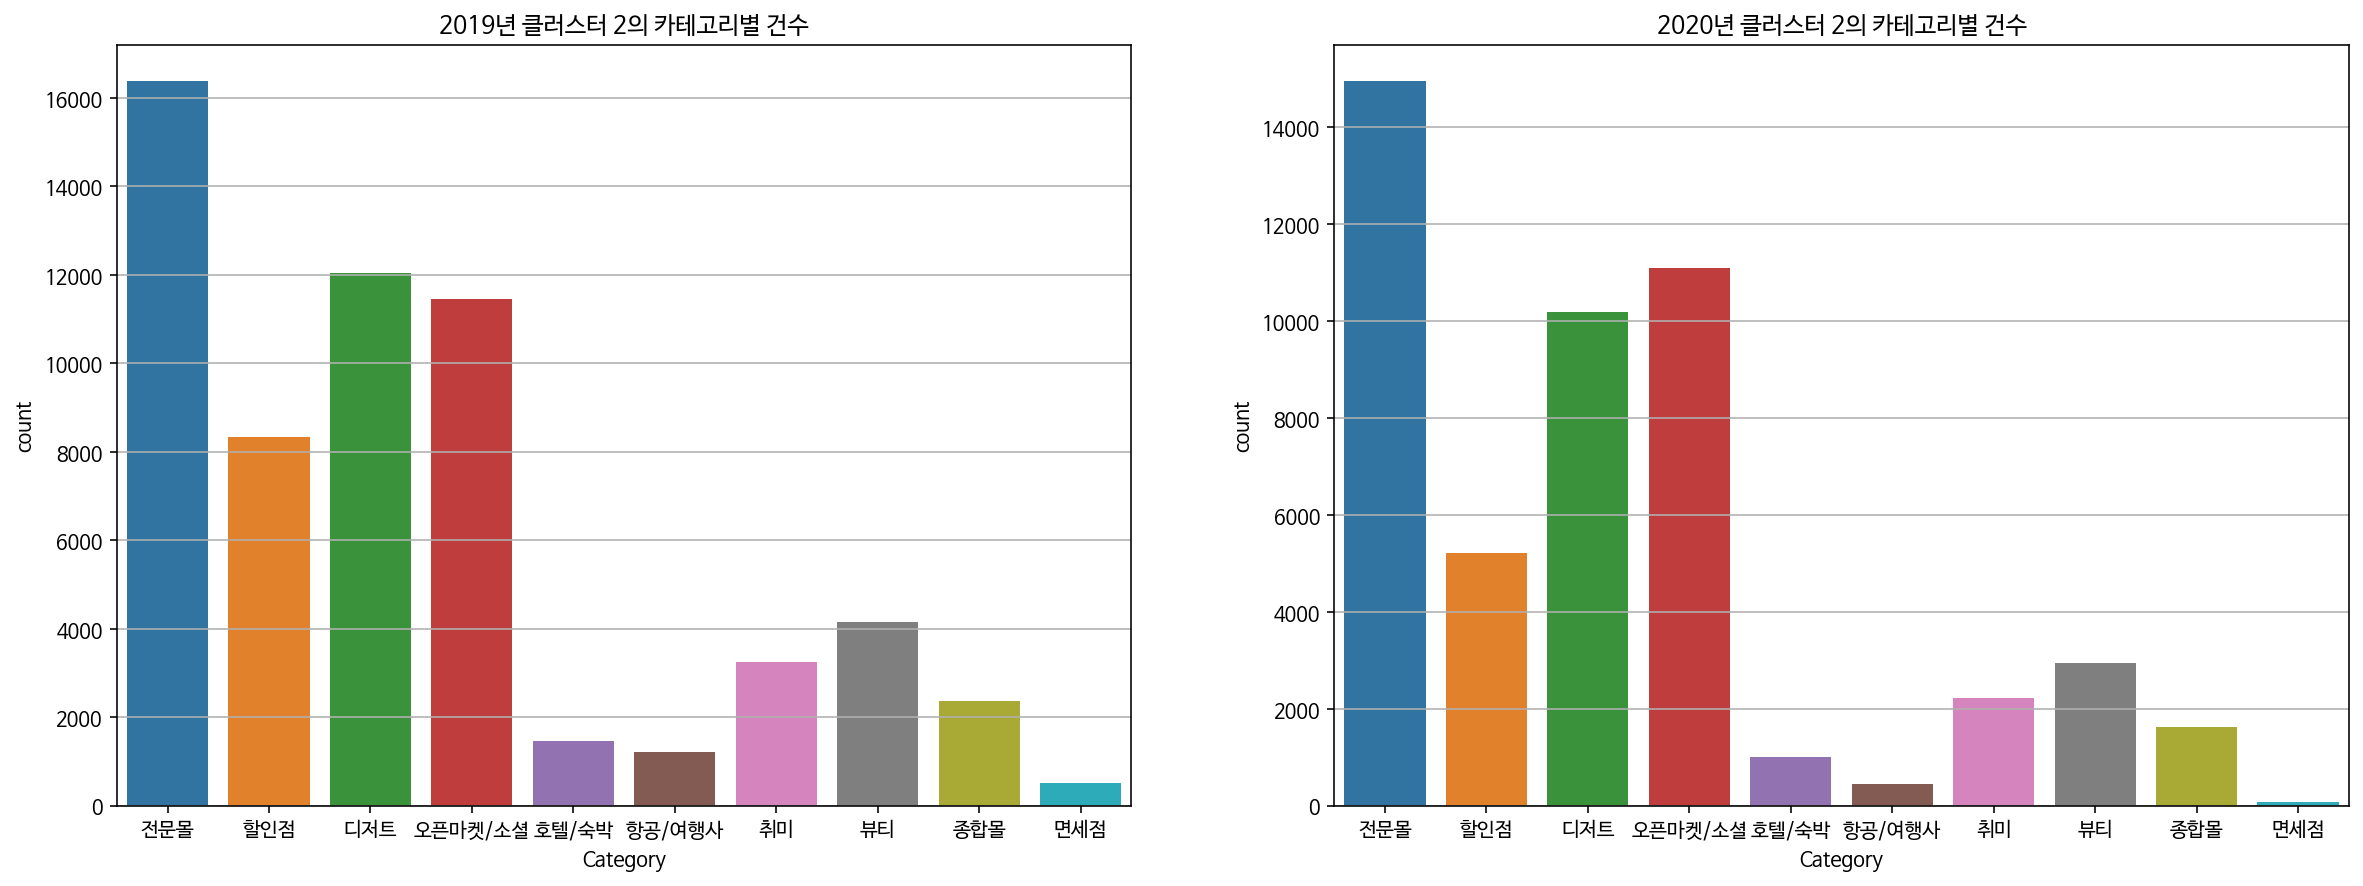

In [19]:
#2019년 인기 카테고리
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('2019년 클러스터 2의 카테고리별 건수')
plt.grid(True)
sns.countplot(cl2_19['Category'],order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
#2020년 인기 카테고리
plt.subplot(122)
plt.title('2020년 클러스터 2의 카테고리별 건수')
plt.grid(True)
sns.countplot(cl2_20['Category'],order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
###할인점의 이용이 크게 줄었고, 오픈마켓/소셜의 이용이 좀 늘어남. 그 외 호텔/숙박, 항공/여행사, 면세점에서 감소

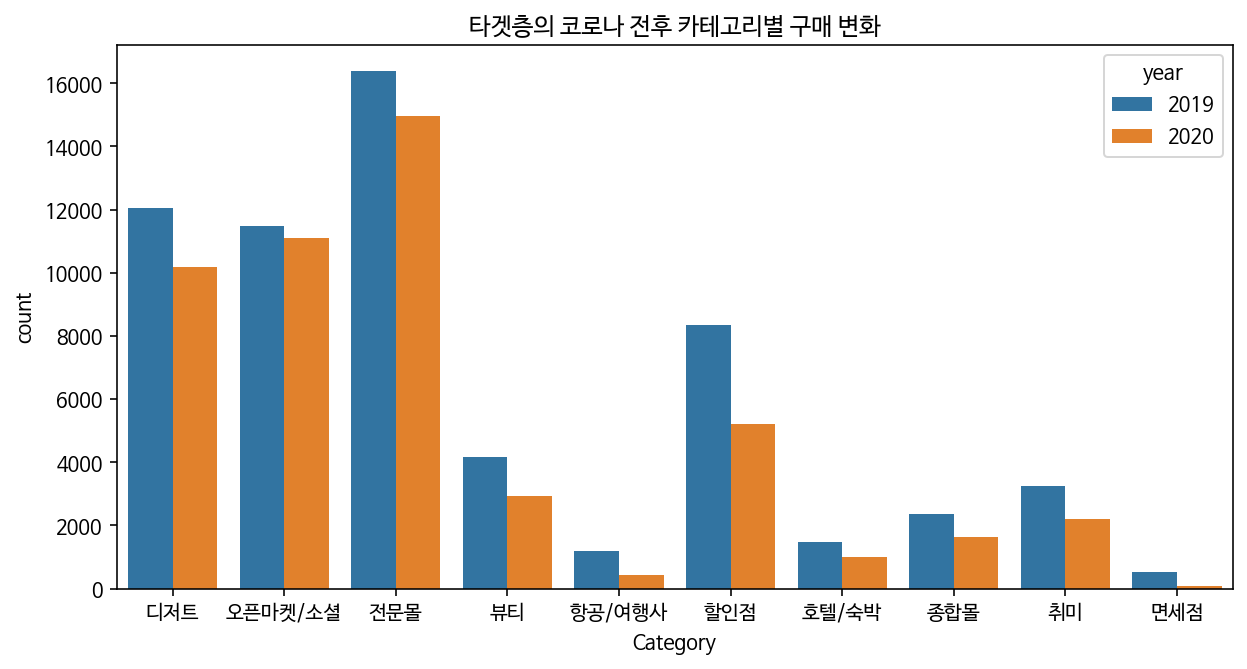

In [37]:
# 코로나 전후 카테고리별 구매 변화 
plt.figure(figsize=(10,5))
sns.countplot(data=cl2, x='Category', hue='year')
plt.title("타겟층의 코로나 전후 카테고리별 구매 변화")
plt.show()

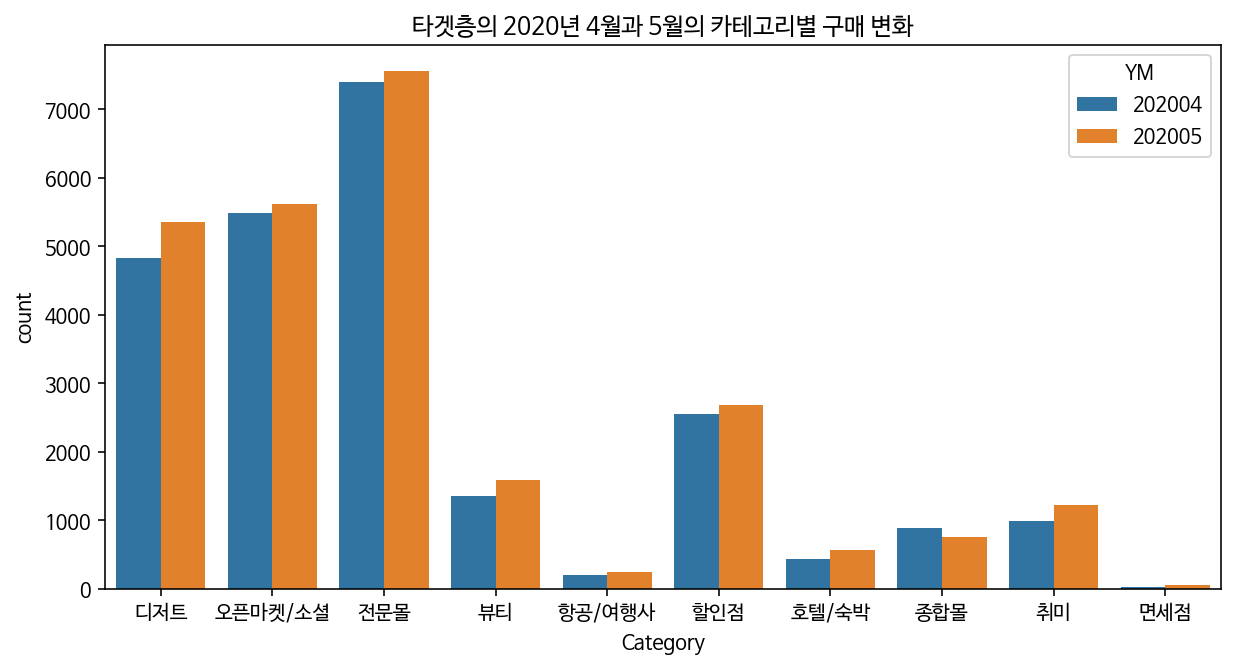

In [35]:
# 4&5월 카테고리별 구매 변화 
plt.figure(figsize=(10,5))
sns.countplot(data=cl2_20, x='Category', hue='YM')
plt.title("타겟층의 2020년 4월과 5월의 카테고리별 구매 변화")
plt.show()

In [23]:
df2

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,year,온라인,clst
0,202005,할인점,0,5,3,1,3,2,1,1,2020,0,0
1,202005,취미,0,7,3,1,2,2,1,1,2020,0,1
2,202005,오픈마켓/소셜,1,3,2,2,2,2,1,2,2020,1,0
3,202005,뷰티,0,3,2,2,2,2,1,1,2020,0,0
4,202005,오픈마켓/소셜,0,6,3,1,2,2,2,1,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,1,1,2,1,1,1,1,2019,1,2
452034,201904,할인점,0,8,3,1,1,1,1,1,2019,0,1
452035,201904,할인점,1,8,3,1,1,1,1,1,2019,0,1
452036,201904,할인점,0,8,3,1,1,1,1,1,2019,0,1


In [25]:
df2['타겟'] = df2['clst'].apply(lambda x: 1 if x==2 else 0)
df2

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,year,온라인,clst,타겟
0,202005,할인점,0,5,3,1,3,2,1,1,2020,0,0,0
1,202005,취미,0,7,3,1,2,2,1,1,2020,0,1,0
2,202005,오픈마켓/소셜,1,3,2,2,2,2,1,2,2020,1,0,0
3,202005,뷰티,0,3,2,2,2,2,1,1,2020,0,0,0
4,202005,오픈마켓/소셜,0,6,3,1,2,2,2,1,2020,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,1,1,2,1,1,1,1,2019,1,2,1
452034,201904,할인점,0,8,3,1,1,1,1,1,2019,0,1,0
452035,201904,할인점,1,8,3,1,1,1,1,1,2019,0,1,0
452036,201904,할인점,0,8,3,1,1,1,1,1,2019,0,1,0


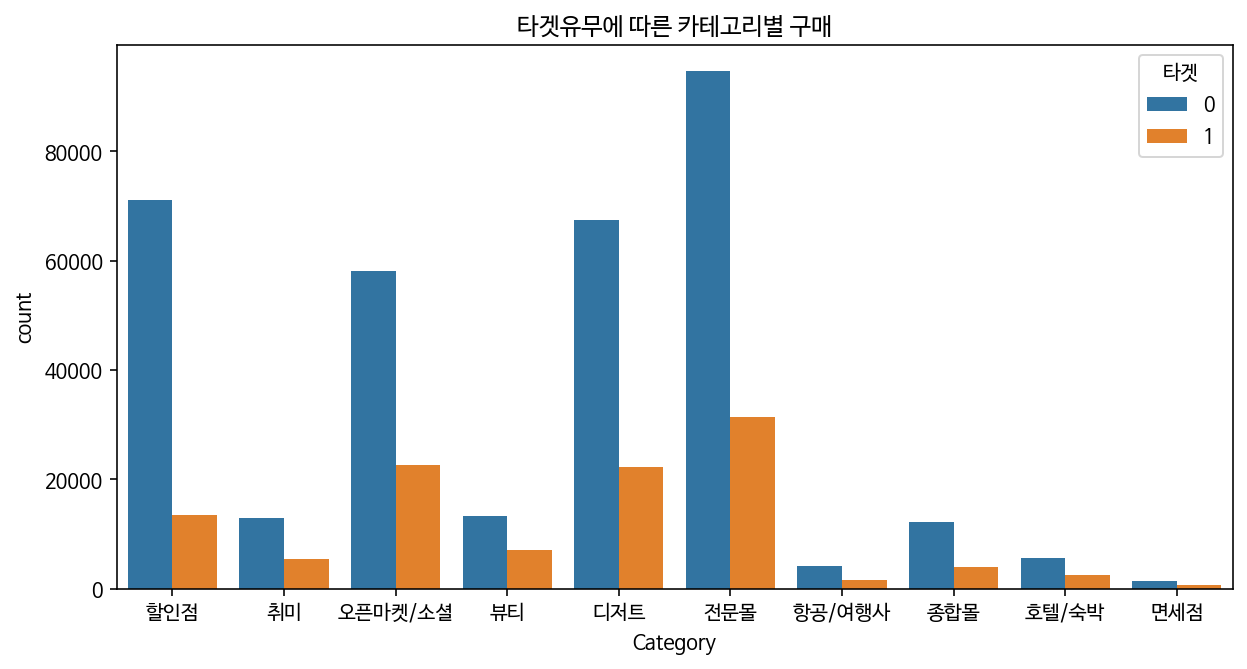

In [34]:
# 타겟유무에 따른 카테고리별 구매 
plt.figure(figsize=(10,5))
sns.countplot(data=df2, x='Category', hue='타겟')
plt.title("타겟유무에 따른 카테고리별 구매")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


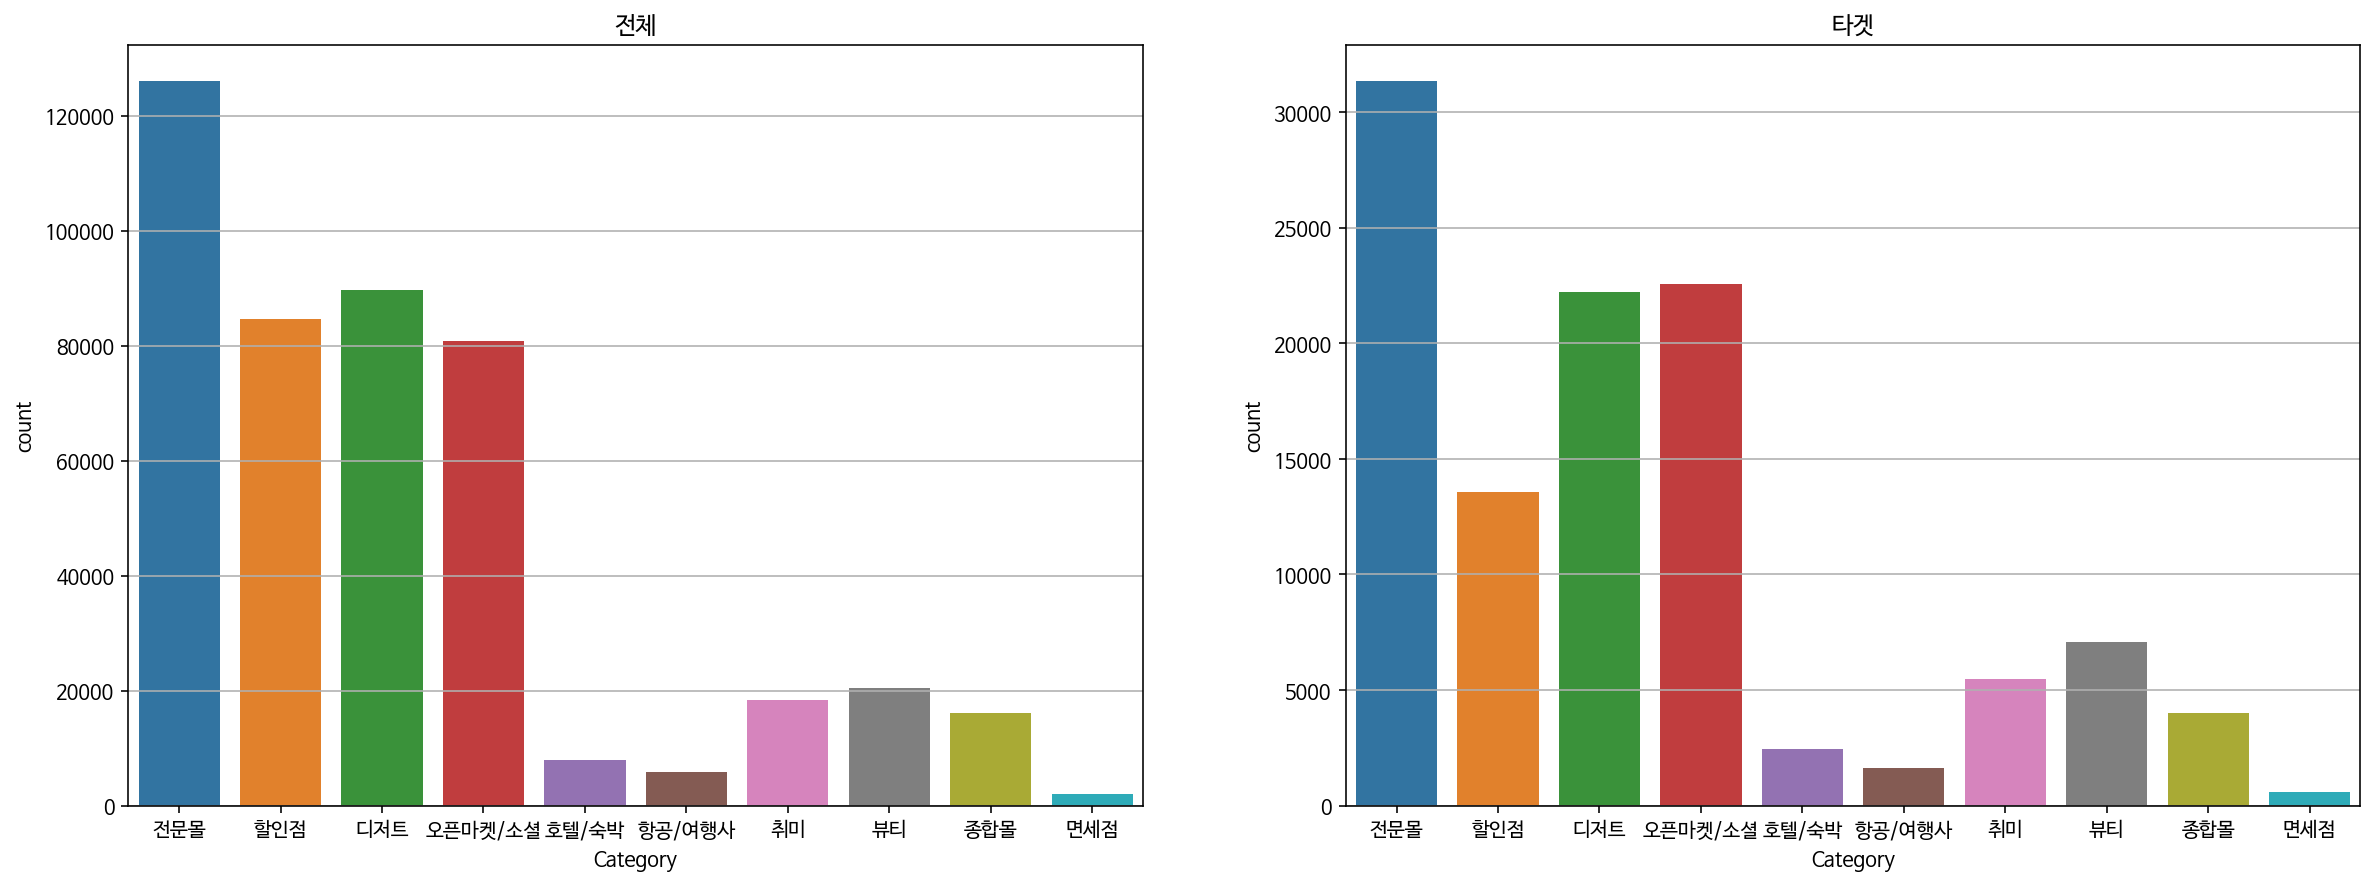

In [36]:
#타겟아님
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.title('전체')
plt.grid(True)
sns.countplot(df2['Category'],order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])
#타겟
plt.subplot(122)
plt.title('타겟')
plt.grid(True)
sns.countplot(df2[df2['타겟']==1]['Category'],order=['전문몰','할인점','디저트','오픈마켓/소셜','호텔/숙박','항공/여행사','취미','뷰티','종합몰','면세점'])

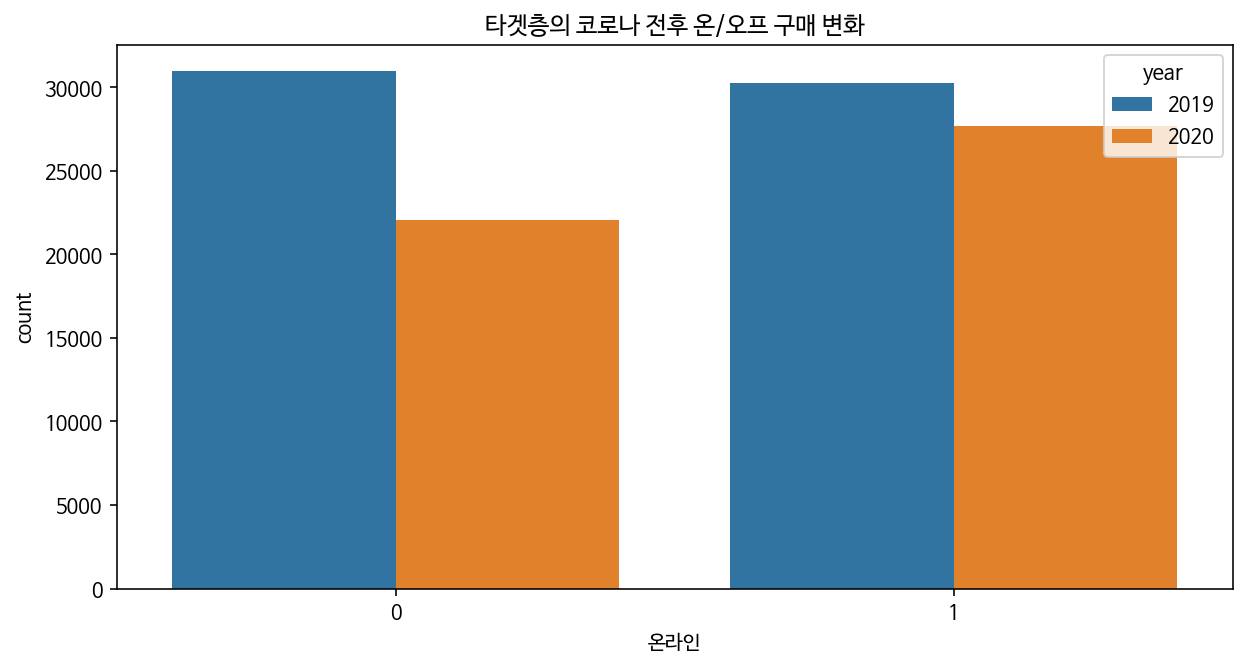

In [38]:
# 코로나 전후 카테고리별 구매 변화 
plt.figure(figsize=(10,5))
sns.countplot(data=cl2, x='온라인', hue='year')
plt.title("타겟층의 코로나 전후 온/오프 구매 변화")
plt.show()

##### 최적 클러스터 찾아보기

In [ ]:
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters = i, init = 'k-means++', random_state= 0)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()

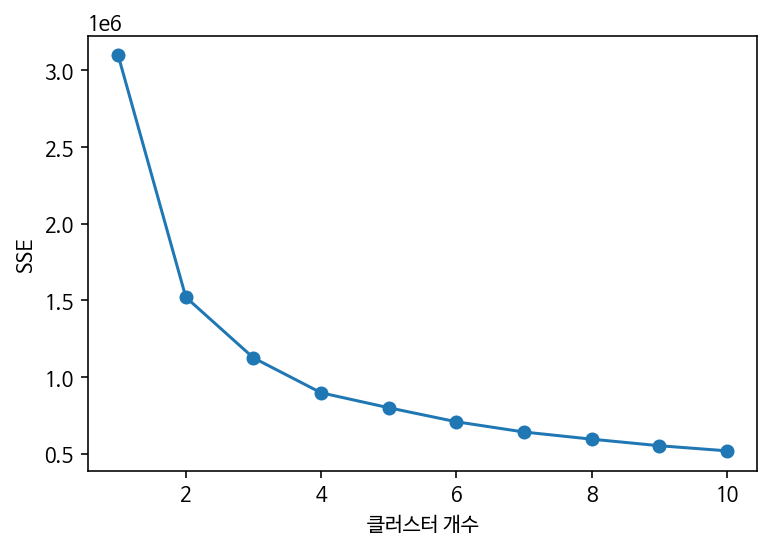

In [ ]:
elbow(df[important])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=2020)
kmeans.fit_predict(df1[important])

df2 = df1.copy()
df2['clst']=kmeans.labels_
df2.groupby('clst').mean()

,YM,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
clst,,,,,,,,,
0,201951.122100,0.516377,3.492279,2.735477,1.933972,1.876540,2.108570,1.098850,1.555648
1,201949.728932,0.500657,7.938047,3.000000,1.000000,1.002780,1.053637,1.125196,1.492442
2,201952.623646,0.526432,5.759391,3.000000,1.039458,2.286737,2.089075,1.571214,1.516018
3,201949.332503,0.570477,1.507650,1.834082,1.939158,1.628956,1.000000,1.000000,1.567690


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


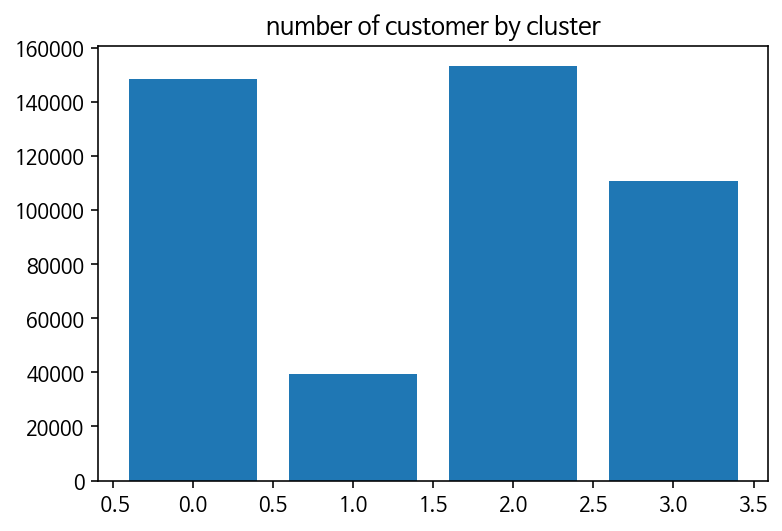

In [ ]:
clst_label, clst_cust_counts = np.unique(kmeans.labels_, return_counts=True)
plt.bar(clst_label, clst_cust_counts)
plt.title('number of customer by cluster')
plt.show()

In [ ]:
df19 = df2019.copy()
df20 = df2020.copy()

In [ ]:
from sklearn.cluster import KMeans

df1 = df19.copy()
kmeans = KMeans(n_clusters=4, random_state=2020)
kmeans.fit_predict(df1[important])

df2 = df1.copy()
df2['clst']=kmeans.labels_
df2.groupby('clst').mean()

,YM,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,year,온라인
clst,,,,,,,,,,,
0,201904.447593,0.499054,7.892509,3.000000,1.000000,1.004938,1.092445,1.127152,1.498869,2019.0,0.303780
1,201904.504281,0.517559,3.474853,2.735163,1.931685,2.216491,2.113538,1.099121,1.566829,2019.0,0.494897
2,201904.504415,0.568934,1.491432,1.814993,1.922041,1.646648,1.000000,1.000000,1.569948,2019.0,0.493558
3,201904.514975,0.530351,5.745080,3.000000,1.044196,2.351873,2.097241,1.562497,1.524125,2019.0,0.415939


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


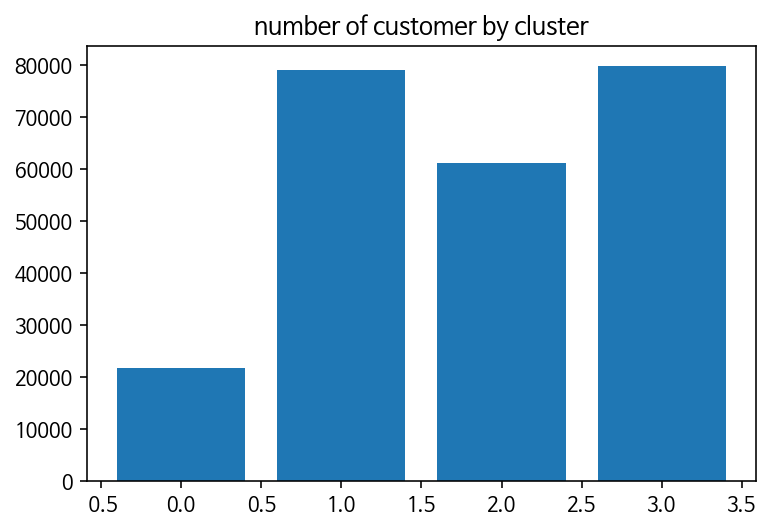

In [ ]:
clst_label, clst_cust_counts = np.unique(kmeans.labels_, return_counts=True)
plt.bar(clst_label, clst_cust_counts)
plt.title('number of customer by cluster')
plt.show()

In [ ]:
# 클러스터 0 그룹: 30대 중반, 기혼, 중고생 자녀
df_clst0 = df2[df2['clst']==0]
df_clst0_2019 = df_clst0[df_clst0['YM']<202000]
df_clst0_2020 = df_clst0[df_clst0['YM']>=202000]

# 클러스터 1 그룹: 60대 이상, 기혼 - 온라인 구매 매우 낮음
df_clst1 = df2[df2['clst']==1]
df_clst1_2019 = df_clst1[df_clst1['YM']<202000]
df_clst1_2020 = df_clst1[df_clst1['YM']>=202000]

# 클러스터 2 그룹: 40대 중후반, 기혼, 초중고 자녀
df_clst2 = df2[df2['clst']==2]
df_clst2_2019 = df_clst2[df_clst2['YM']<202000]
df_clst2_2020 = df_clst2[df_clst2['YM']>=202000]

# 클러스터 3 그룹: 20대, 미혼
df_clst3 = df2[df2['clst']==3]
df_clst3_2019 = df_clst3[df_clst3['YM']<202000]
df_clst3_2020 = df_clst3[df_clst3['YM']>=202000]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '클러스터 0 연령대')

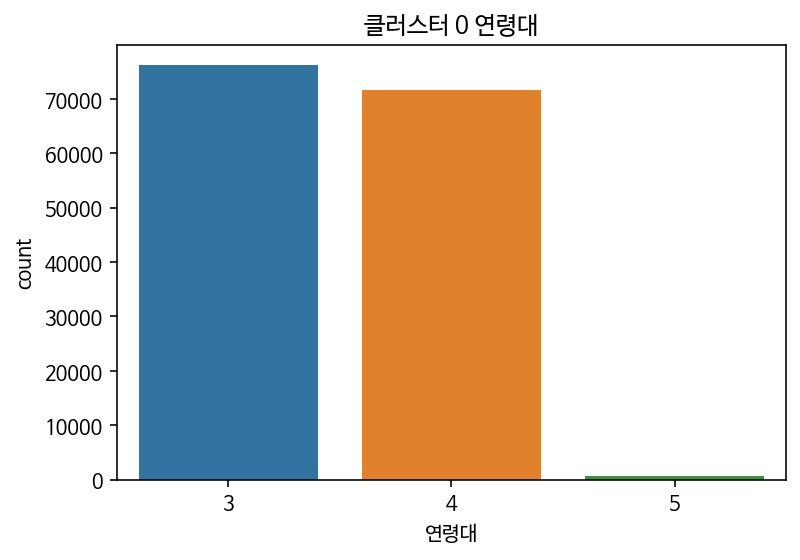

In [ ]:
sns.countplot(df_clst0['연령대'])
plt.title('클러스터 0 연령대')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

Text(0.5, 1.0, '클러스터 0 대학생자녀')

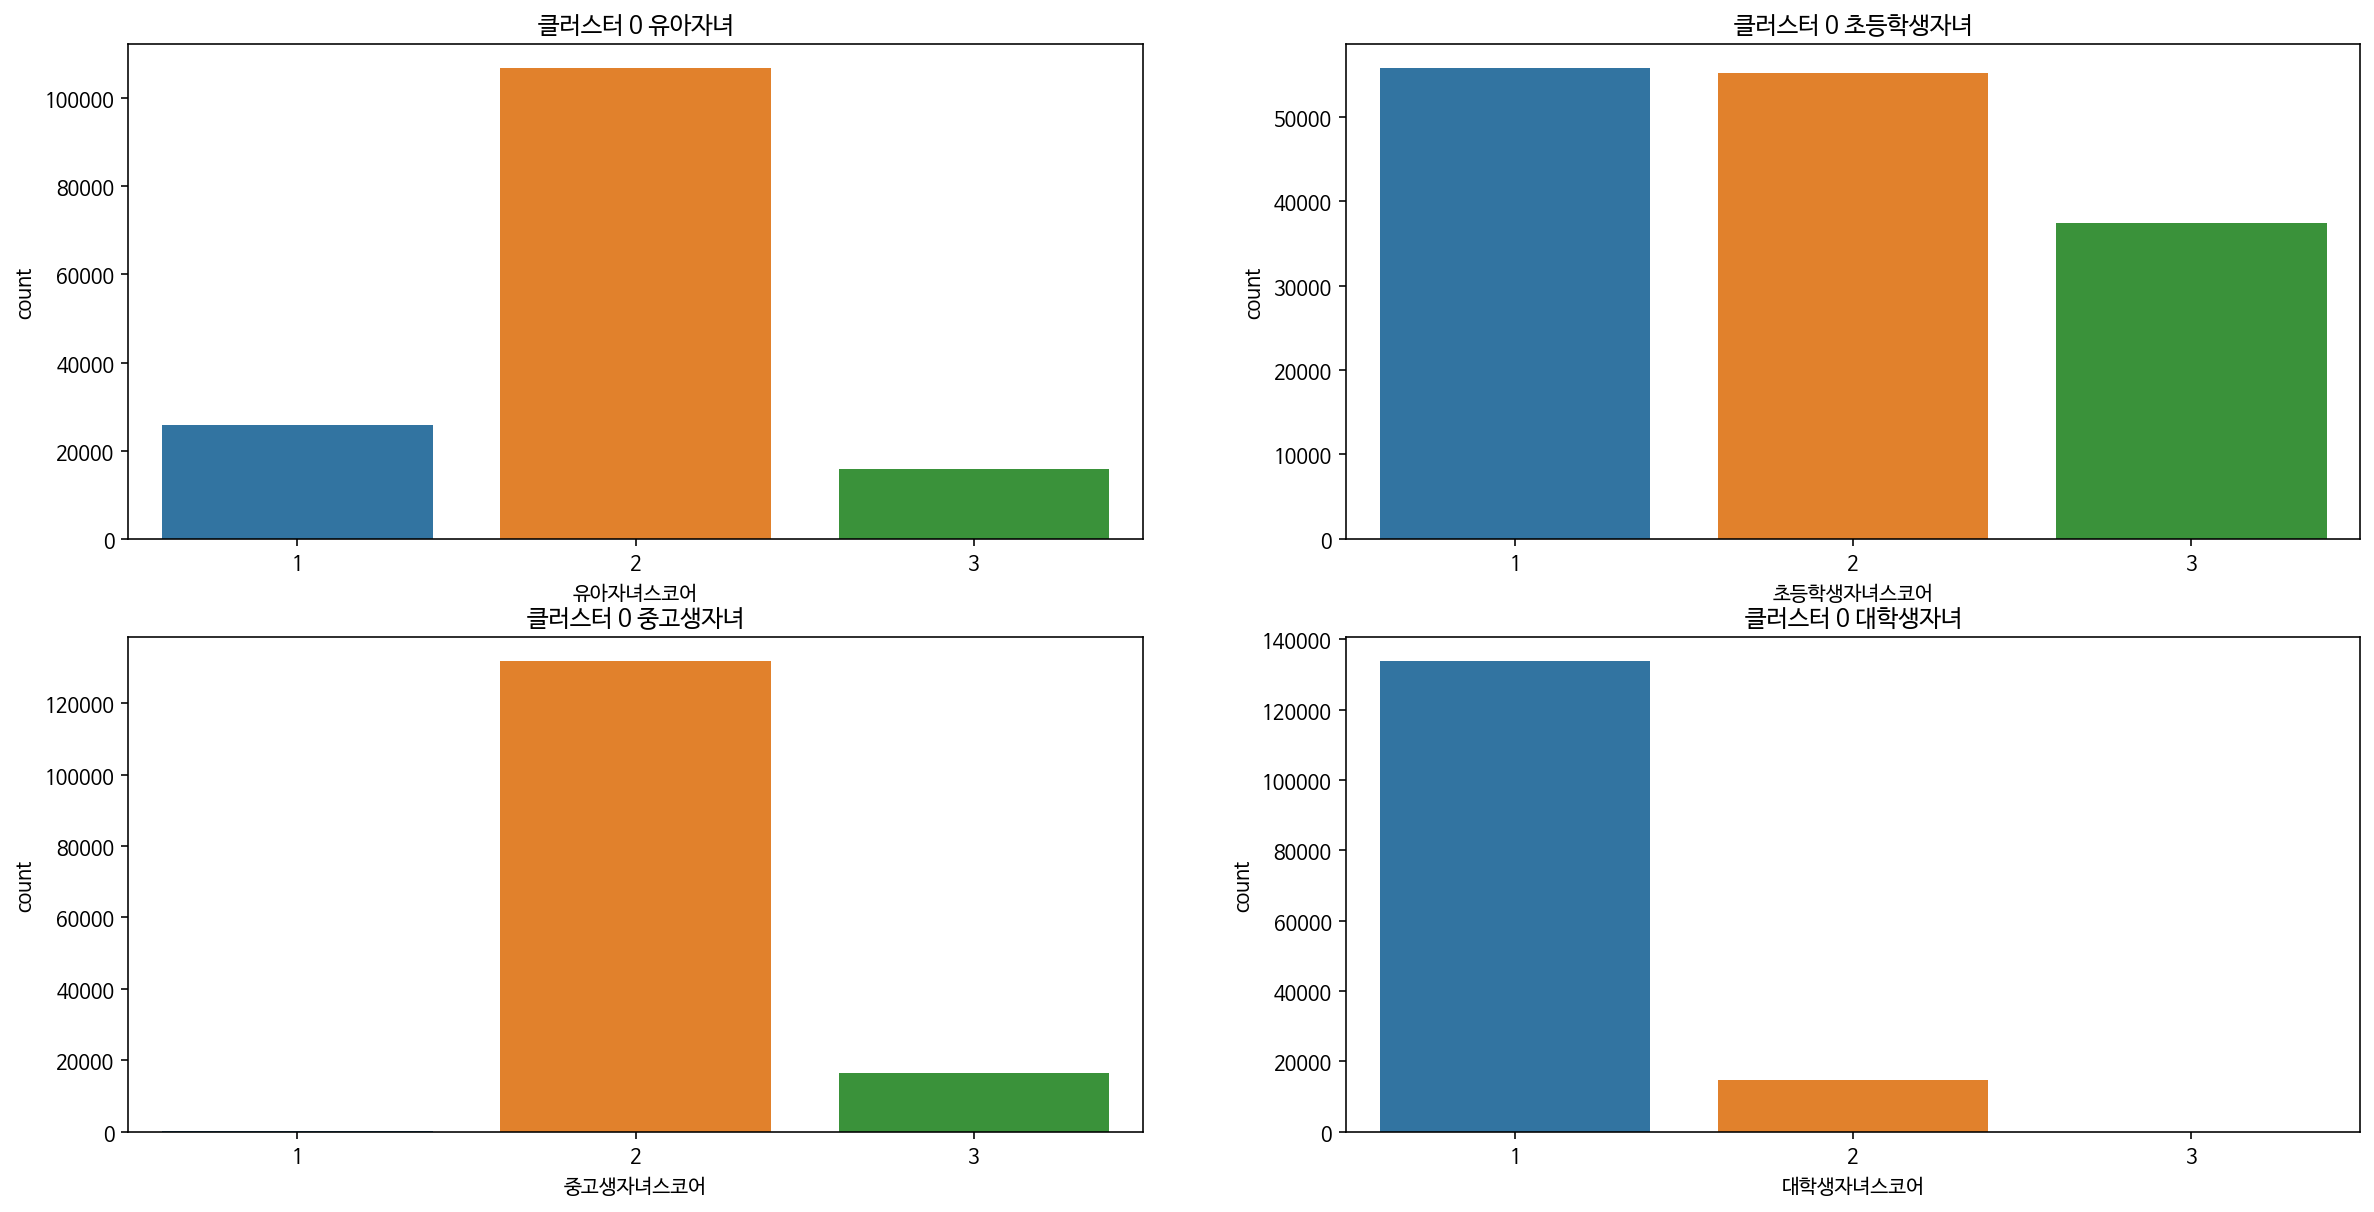

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(df_clst0['유아자녀스코어'])
plt.title('클러스터 0 유아자녀')
plt.subplot(222)
sns.countplot(df_clst0['초등학생자녀스코어'])
plt.title('클러스터 0 초등학생자녀')
plt.subplot(223)
sns.countplot(df_clst0['중고생자녀스코어'])
plt.title('클러스터 0 중고생자녀')
plt.subplot(224)
sns.countplot(df_clst0['대학생자녀스코어'])
plt.title('클러스터 0 대학생자녀')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '클러스터 2 연령대')

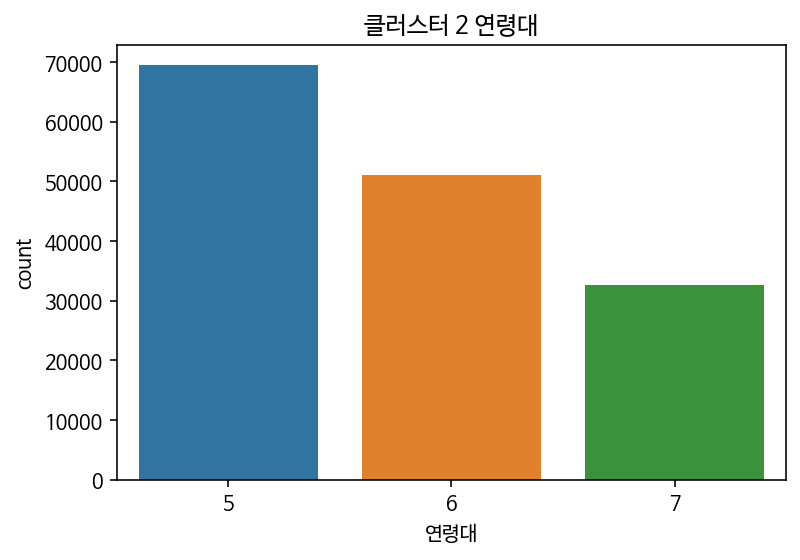

In [ ]:
sns.countplot(df_clst2['연령대'])
plt.title('클러스터 2 연령대')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

Text(0.5, 1.0, '클러스터 2 대학생자녀')

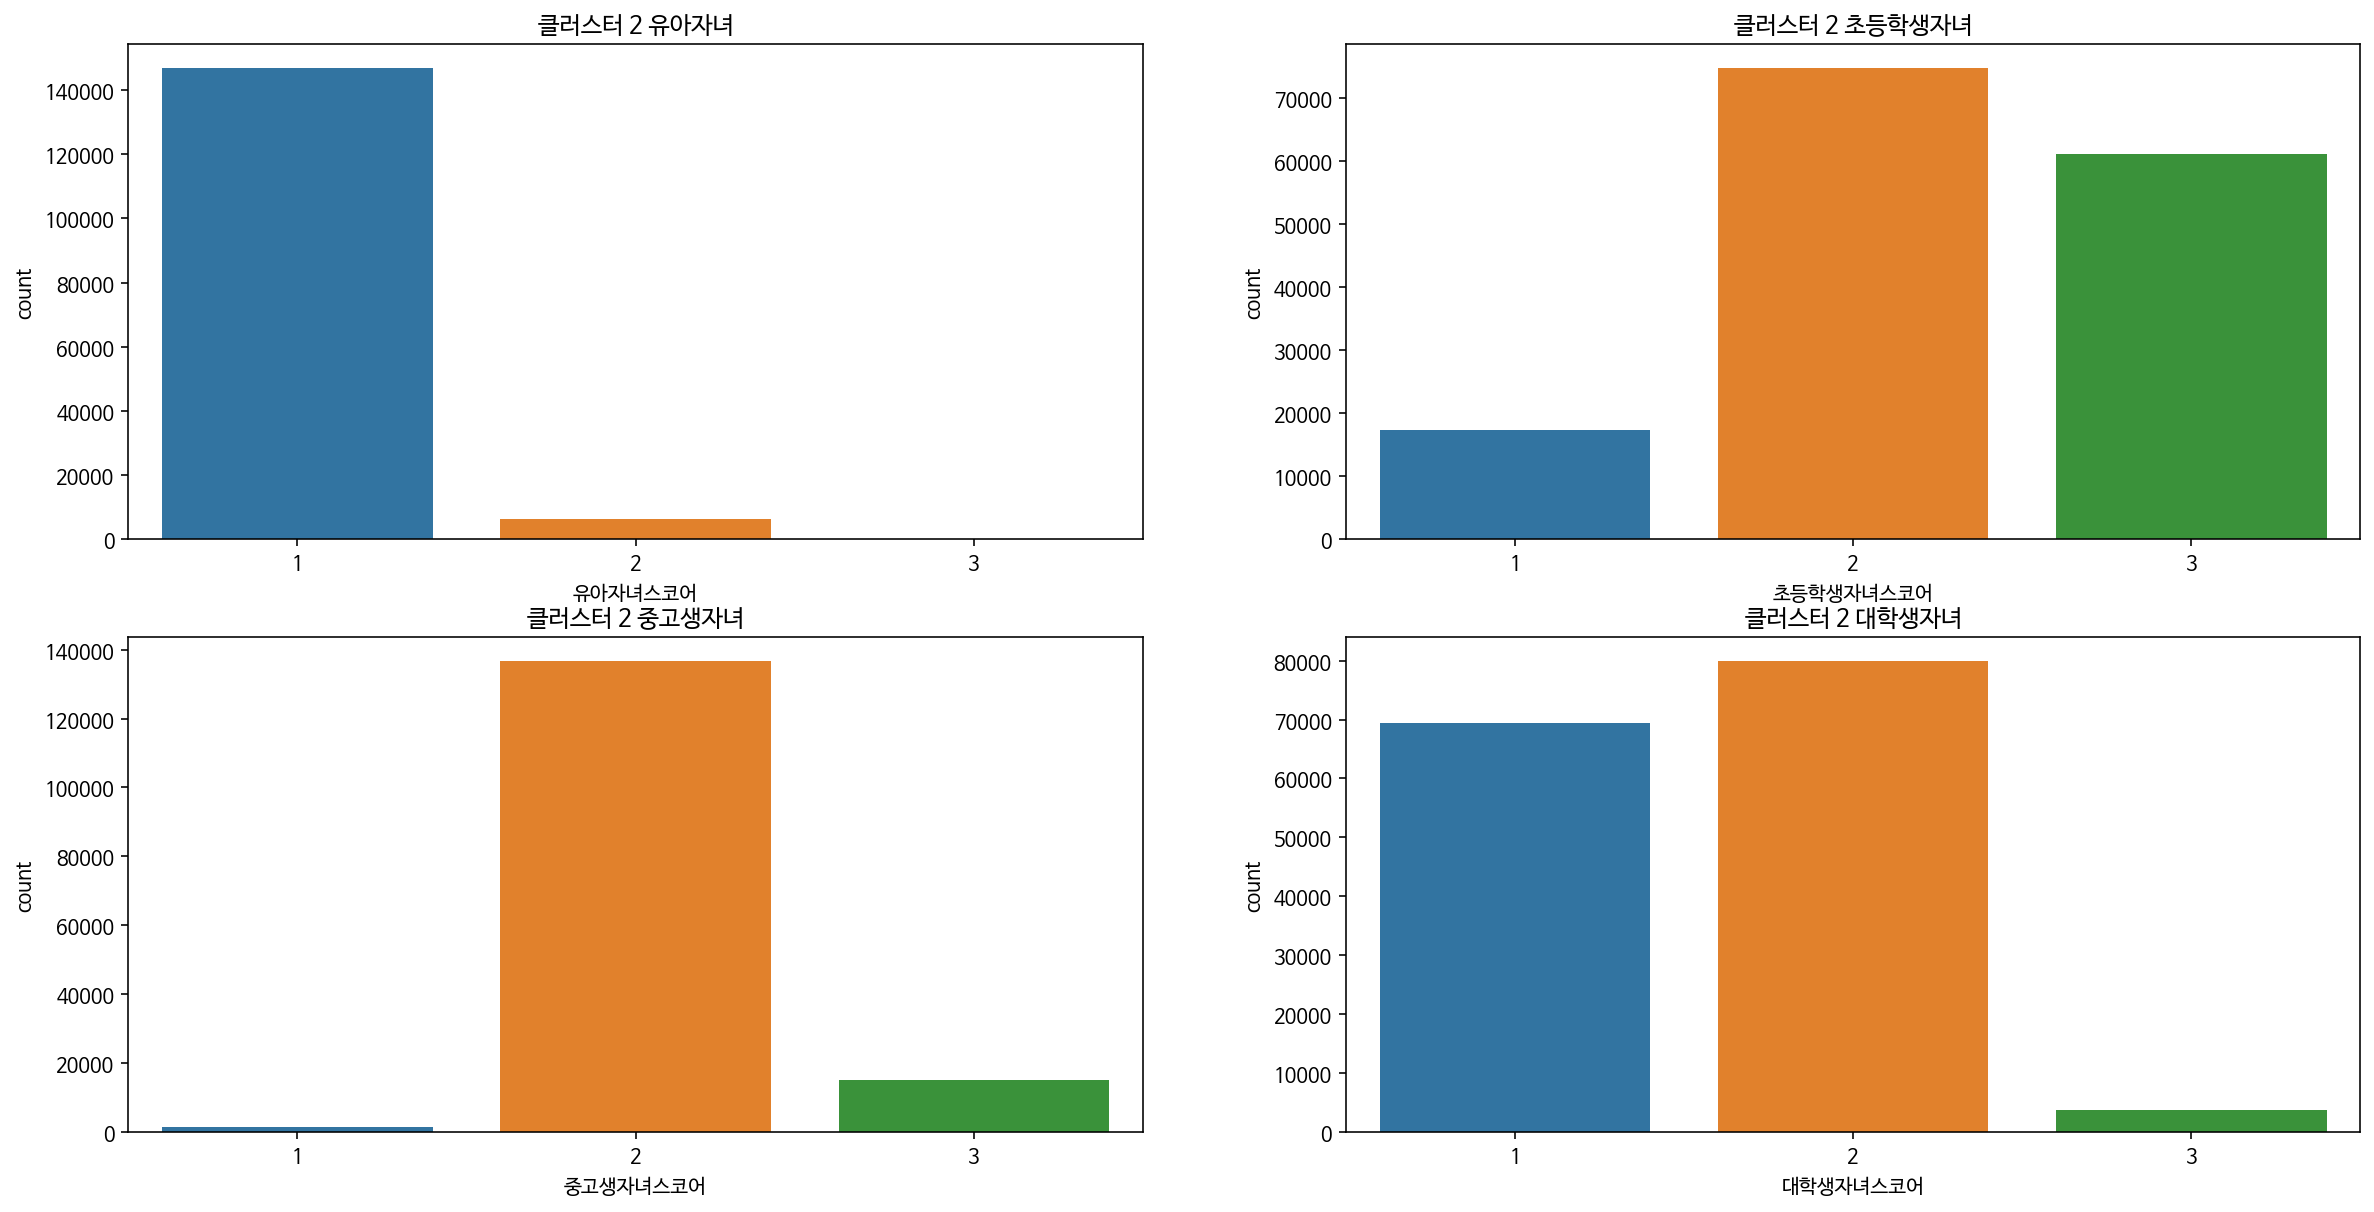

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(df_clst2['유아자녀스코어'])
plt.title('클러스터 2 유아자녀')
plt.subplot(222)
sns.countplot(df_clst2['초등학생자녀스코어'])
plt.title('클러스터 2 초등학생자녀')
plt.subplot(223)
sns.countplot(df_clst2['중고생자녀스코어'])
plt.title('클러스터 2 중고생자녀')
plt.subplot(224)
sns.countplot(df_clst2['대학생자녀스코어'])
plt.title('클러스터 2 대학생자녀')

In [ ]:
from sklearn.cluster import KMeans

df1 = df20.copy()
kmeans = KMeans(n_clusters=4, random_state=2020)
kmeans.fit_predict(df1[important])

df2 = df1.copy()
df2['clst']=kmeans.labels_
df2.groupby('clst').mean()

,YM,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,year,온라인
clst,,,,,,,,,,,
0,202004.514998,0.572414,1.528296,1.857646,1.960247,1.607520,1.000000,1.000000,1.564951,2020.0,0.556280
1,202004.519171,0.521235,5.772131,3.000000,1.037378,2.212065,2.080758,1.578694,1.506368,2020.0,0.515465
2,202004.519050,0.515901,3.507058,2.735129,1.936542,1.491049,2.102787,1.098886,1.543859,2020.0,0.590542
3,202004.521455,0.502849,7.993016,3.000000,1.000000,1.000168,1.006816,1.123142,1.484915,2020.0,0.413231


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


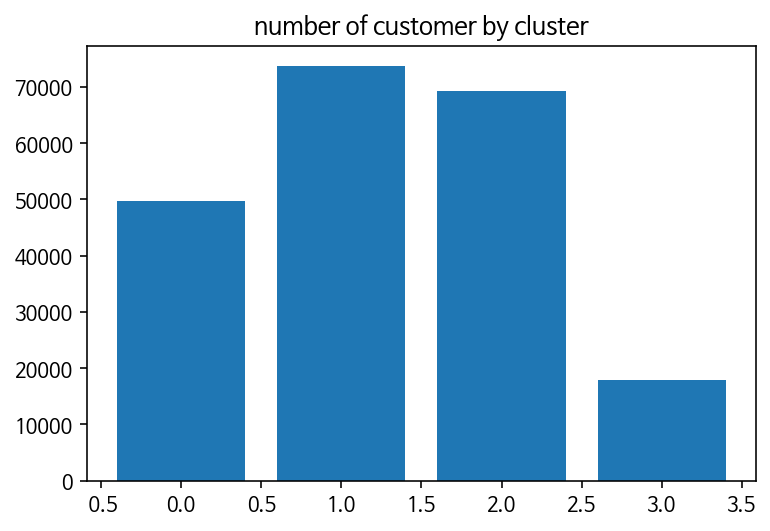

In [ ]:
clst_label, clst_cust_counts = np.unique(kmeans.labels_, return_counts=True)
plt.bar(clst_label, clst_cust_counts)
plt.title('number of customer by cluster')
plt.show()

In [ ]:
df2.groupby('clst')['Category'].value_counts()

clst  Category
0     전문몰         25313
      오픈마켓/소셜     19544
      디저트         17046
      할인점          9759
      뷰티           3946
      종합몰          3425
      취미           3050
      호텔/숙박        1481
      항공/여행사        660
      면세점           100
1     전문몰         17731
      디저트         12176
      오픈마켓/소셜     10873
      할인점          9745
      뷰티           2270
      취미           2116
      종합몰          1969
      호텔/숙박         759
      항공/여행사        354
      면세점            38
2     전문몰         15428
      오픈마켓/소셜     10204
      디저트         10180
      할인점          8291
      종합몰          2066
      뷰티           1645
      취미           1520
      호텔/숙박         643
      항공/여행사        337
      면세점            26
3     전문몰          5024
      할인점          4904
      디저트          3603
      오픈마켓/소셜      2012
      취미            787
      뷰티            728
      종합몰           295
      호텔/숙박         276
      항공/여행사        113
      면세점            31
Name: Category, dtype: in